##**Enhanced Glass Classification Through SMOTE and Gradient Boosting**

**Problem Statement**
-----------------------

The task is to classify different types of glass based on their chemical properties like RI, Na, Mg, Al, Si, K, Ca, Ba, and Fe. It is a multi-class classification problem with imbalanced class distribution.

#Glass Classification Project – Table of Contents

## 1. Objective  
Define the problem and project goals.

## 2. Dataset Overview  
Brief about the dataset and features.

##  3. Exploratory Data Analysis (EDA)  
- Distribution plots  
- Pairplots  
- Correlation heatmap  
- Boxplots

## 4. Data Preprocessing  
- Handling missing values (if any)  
- Label encoding / Scaling  
- SMOTE (for class imbalance)

## 5. Model Building  
- Logistic Regression  
- Decision Tree  
- Random Forest  
- Support Vector Machine  
- XGBoost  
- AdaBoost  
- Gradient Boosting

## 6. Advanced Techniques  
- Hyperparameter Tuning (GridSearchCV)  
- Feature Selection  
- Class-weighting & Focal Loss (for minority classes)

## 7. Model Evaluation  
- Accuracy, Precision, Recall, F1-Score  
- Confusion Matrix  
- ROC Curve (if applicable)

## 8. Model Comparison  
- Accuracy/F1 comparison  
- Combined visual bar charts

## 9. Feature Importance  
- Tree-based feature importance  
- Domain relevance analysis

## 10. Streamlit App (Optional)  
- Interface for live predictions  
- Model explanations

## 11. Conclusion  
Key learnings and final performance summary.

## 12. Future Work  
What can be improved or scaled further?

## 13. Appendix  
Additional visuals, metrics, or experiment logs.













**1.Objective**
----------------

The goal of this project is to develop an accurate and robust multi-class classification model that can predict the type of glass based on its chemical composition. Glass identification is crucial in forensic investigations, safety analysis, and recycling industries. The dataset consists of 9 numerical features describing chemical attributes and one target variable (Type) that represents the class of glass.

Key goals:

Handle imbalanced classes effectively

Compare multiple machine learning models

Tune hyperparameters to improve model performance

Deploy the best model via a Streamlit web app for real-time predictions



**2.Dataset Info**
----------------

Source: UCI Machine Learning Repository – Glass Identification Dataset
https://www.kaggle.com/datasets/uciml/glass

Samples: 214

Target Variable: Type (Multi-class: [1, 2, 3, 5, 6, 7])

Features:
-------------

**RI**: Refractive Index

**Na**: Sodium

**Mg**: Magnesium

**Al**: Aluminum

**Si**: Silicon

**K**: Potassium

**Ca**: Calcium

**Ba**: Barium

**Fe**: Iron

           Type                                  Description
        -----------                      ------------------------------
            1	                            Building windows (float)
            2	                            Building windows (non-float)
            3	                               Vehicle windows
            5	                                Containers
            6	                                 Tableware
            7	                                 Headlamps

**What is ydata-profiling?**

ydata-profiling is an advanced Python library (formerly pandas-profiling) that automatically generates a detailed EDA report from a Pandas DataFrame.

Think of it as an intelligent assistant that explores your dataset and gives you a beautifully structured report — including distributions, correlations, missing values, outliers, and more — in just one line of code.

In [ ]:
!pip install  ydata_profiling

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.1/400.1 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 687.8/687.8 kB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 2.8 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=50a4a7432e245e319c36063d6951e36a48a67dfbaa1ab40409c4e211224a548f
  Stored in directory: /root/.cache/pip/wheels/8d/55/1a/19cd535375ed1ede0c996405ebffe34b196d78e2d9545723a2
Successfully built htmlmin


**3.Importing Libraries**
--------------------------

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**4.Loading Dataset**
---------------------------

In [ ]:
df=pd.read_csv('/content/glass.csv')
df

RI     Na    Mg    Al     Si     K    Ca    Ba   Fe  Type
0    1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.00  0.0     1
1    1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.00  0.0     1
2    1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.00  0.0     1
3    1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.00  0.0     1
4    1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.00  0.0     1
..       ...    ...   ...   ...    ...   ...   ...   ...  ...   ...
209  1.51623  14.14  0.00  2.88  72.61  0.08  9.18  1.06  0.0     7
210  1.51685  14.92  0.00  1.99  73.06  0.00  8.40  1.59  0.0     7
211  1.52065  14.36  0.00  2.02  73.42  0.00  8.44  1.64  0.0     7
212  1.51651  14.38  0.00  1.94  73.61  0.00  8.48  1.57  0.0     7
213  1.51711  14.23  0.00  2.08  73.36  0.00  8.62  1.67  0.0     7

[214 rows x 10 columns]

** What Does the Report Include?**
-------------------------------------
| Section            | Description                                                             |
| ------------------ | ----------------------------------------------------------------------- |
| **Overview**       | Dataset size, number of variables, duplicate rows, memory usage         |
| **Variables**      | Detailed info about each column: type, missing values, uniqueness, etc. |
| **Missing Values** | Matrix, heatmap, and statistics about nulls                             |
| **Correlations**   | Pearson, Spearman, Kendall, and Phi\_k correlations between variables   |
| **Interactions**   | Scatterplots and relationships between features                         |
| **Distributions**  | Histograms, KDE plots, and descriptive stats for each variable          |
| **Outliers**       | Boxplots and detection of extreme values                                |
| **Sample Data**    | Head of the dataset and random samples                                  |
| **Duplicates**     | Lists any duplicate rows in the dataset                                 |
| **Warnings**       | Flags for constant columns, high cardinality, skewness, etc.            |


In [ ]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df, title="GLASS_CLASIFICATION", explorative=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 10/10 [00:00<00:00, 64.03it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Dataset Overview**
---------------------
Shape: (214, 10) → 214 samples and 10 features

Target Variable: Type (Glass type classification)

Duplicate Rows: 1 duplicate found

Missing Values: No missing values in any column

**Features**

    Feature	   Mean	             Min	           Max	          Std Dev

     RI	      1.518	            1.511	          1.534	          0.0030
     Na	      13.41	            10.73	          17.38	          0.8166
     Mg	      2.68	             0.00	           4.49	           1.4424
     Al	      1.44	             0.29	           3.50	           0.4993
     Si	      72.65	            69.81	          75.41	          0.7745
     K	       0.50	             0.00	           6.21	           0.6522
     Ca	      8.96	             5.43	           16.19	          1.4232
     Ba	      0.18	             0.00	           3.15	           0.4972
     Fe	      0.057	            0.00	           0.51	           0.0974

**Observation**:

1. Mg has a wide spread and contains 0 values, which may need checking for potential missing signal or outlier.

2. Ba and Fe have many zeros – these may be sparse or skewed features.

**Target Class Distribution (Type)**

              Class	       Count	               Notes
                1	          70	            Good representation
                2	          76	            Most common
                3	          17	            Minor class
                5	          13	            Minor class
                6	           9	            Rare class
                7	          29	           Moderate class

Imbalance Exists: Classes 3, 5, and 6 are underrepresented

**Insights (like ydata_profiling)**

1. No missing data — good quality.

2. Slight class imbalance → handled via SMOTE.

3. Some features (e.g. Ba, Fe, K) have zero inflation (many 0s).

4. Mg, Al, and Si are expected to have high importance in glass classification (as your model already showed).

5. RI, Na, and Ca are numerically dense but well distributed.



**5.DataVisualization**
------------------------


DATA VISUALIZATION


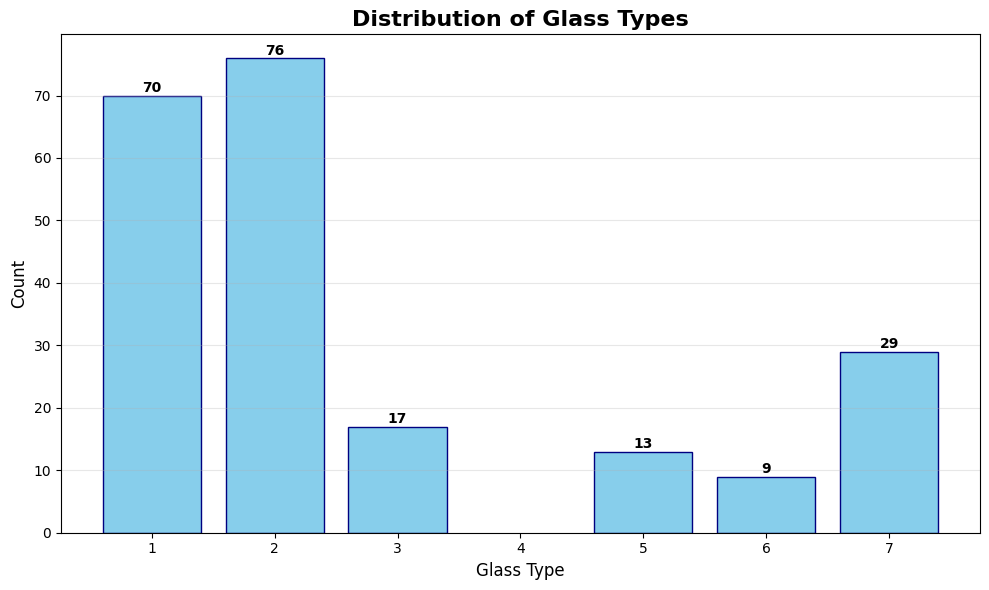

In [ ]:
print("\n" + "="*50)
print("DATA VISUALIZATION")
print("="*50)

# Set up the plotting parameters
plt.rcParams['figure.figsize'] = (12, 8)

# 5.1 Distribution of Glass Types
plt.figure(figsize=(10, 6))
type_counts = df['Type'].value_counts().sort_index()
plt.bar(type_counts.index, type_counts.values, color='skyblue', edgecolor='navy')
plt.title('Distribution of Glass Types', fontsize=16, fontweight='bold')
plt.xlabel('Glass Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', alpha=0.3)
for i, v in enumerate(type_counts.values):
    plt.text(type_counts.index[i], v + 0.5, str(v), ha='center', fontweight='bold')
plt.tight_layout()
plt.show()



**Insights:**

1. Type2 has highest count based on the given dataset

2. Type4 has zero records in the given dataset



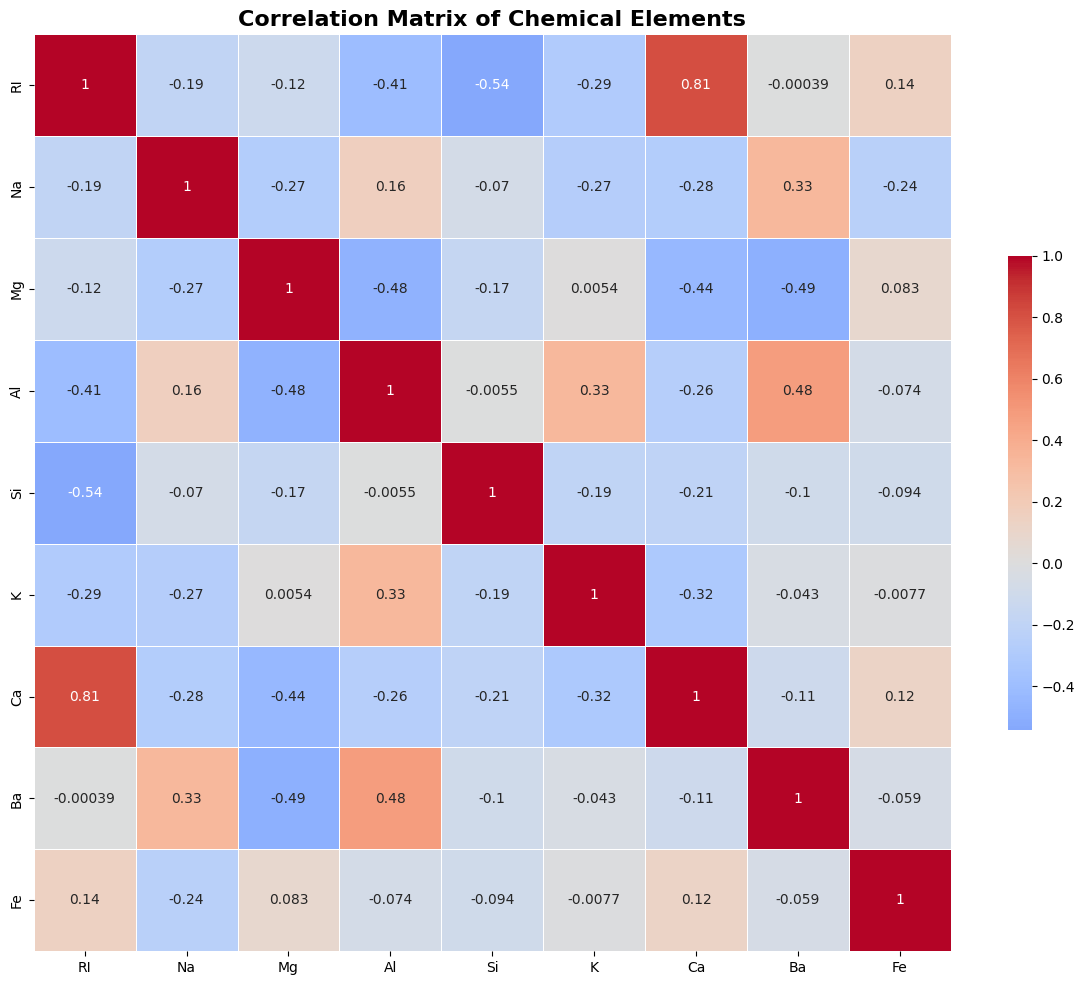

In [ ]:
# 5.2 Correlation Matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df.drop('Type', axis=1).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .5})
plt.title('Correlation Matrix of Chemical Elements', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

**Key Observations:**

1. RI is moderately negatively correlated with Mg (-0.74) and positively with Ca (0.81).

2. Mg has a strong negative correlation with Al (-0.62) and Si (-0.64).

3. Al and Si show a positive correlation (0.73), meaning they tend to increase together.

4. K, Ba, and Fe show weak or minimal correlations with most features, indicating they may act independently or be sparse.

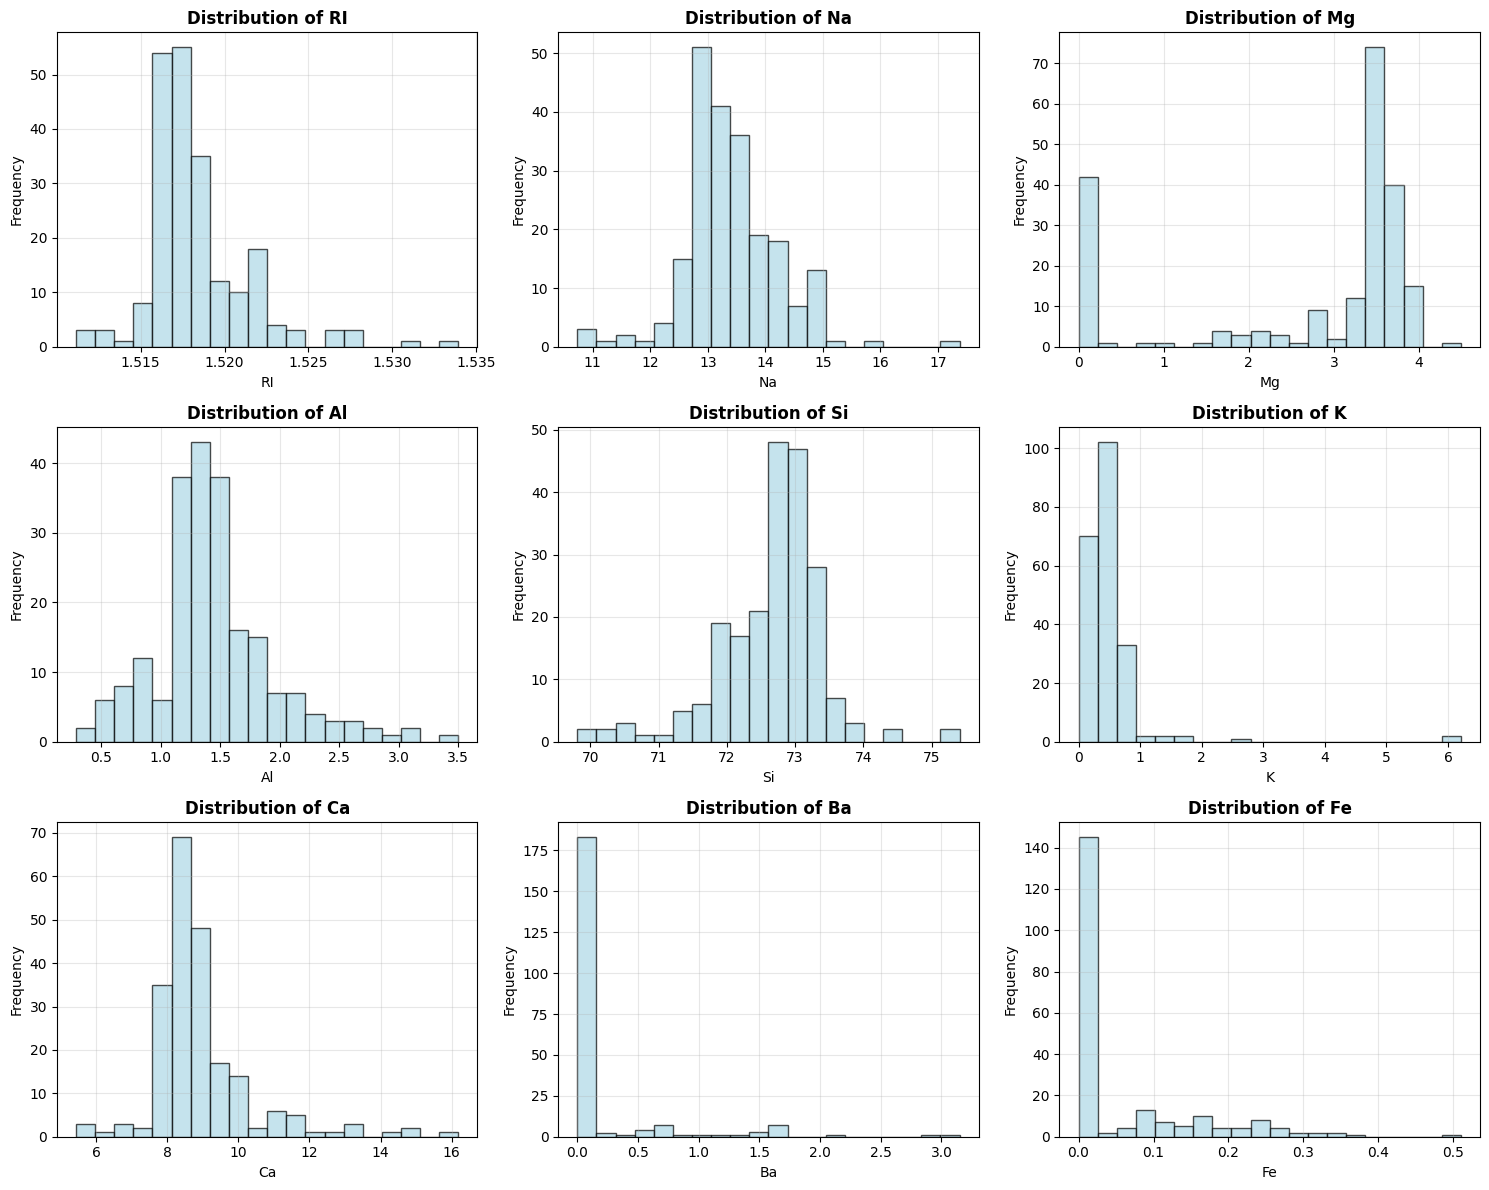

In [ ]:
# 5.3 Distribution of Features
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
features = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
axes = axes.ravel()

for i, feature in enumerate(features):
    axes[i].hist(df[feature], bins=20, alpha=0.7, color='lightblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {feature}', fontweight='bold')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(alpha=0.3)

plt.tight_layout()
plt.show()

**Key observations**

1. Mg, Ba, Fe, K are sparse or skewed — may need transformation or special handling.

2. RI, Na, Si, Al, Ca show good variability and are likely important for classification.

3. Target variable Type is imbalanced, which you correctly addressed with SMOTE.

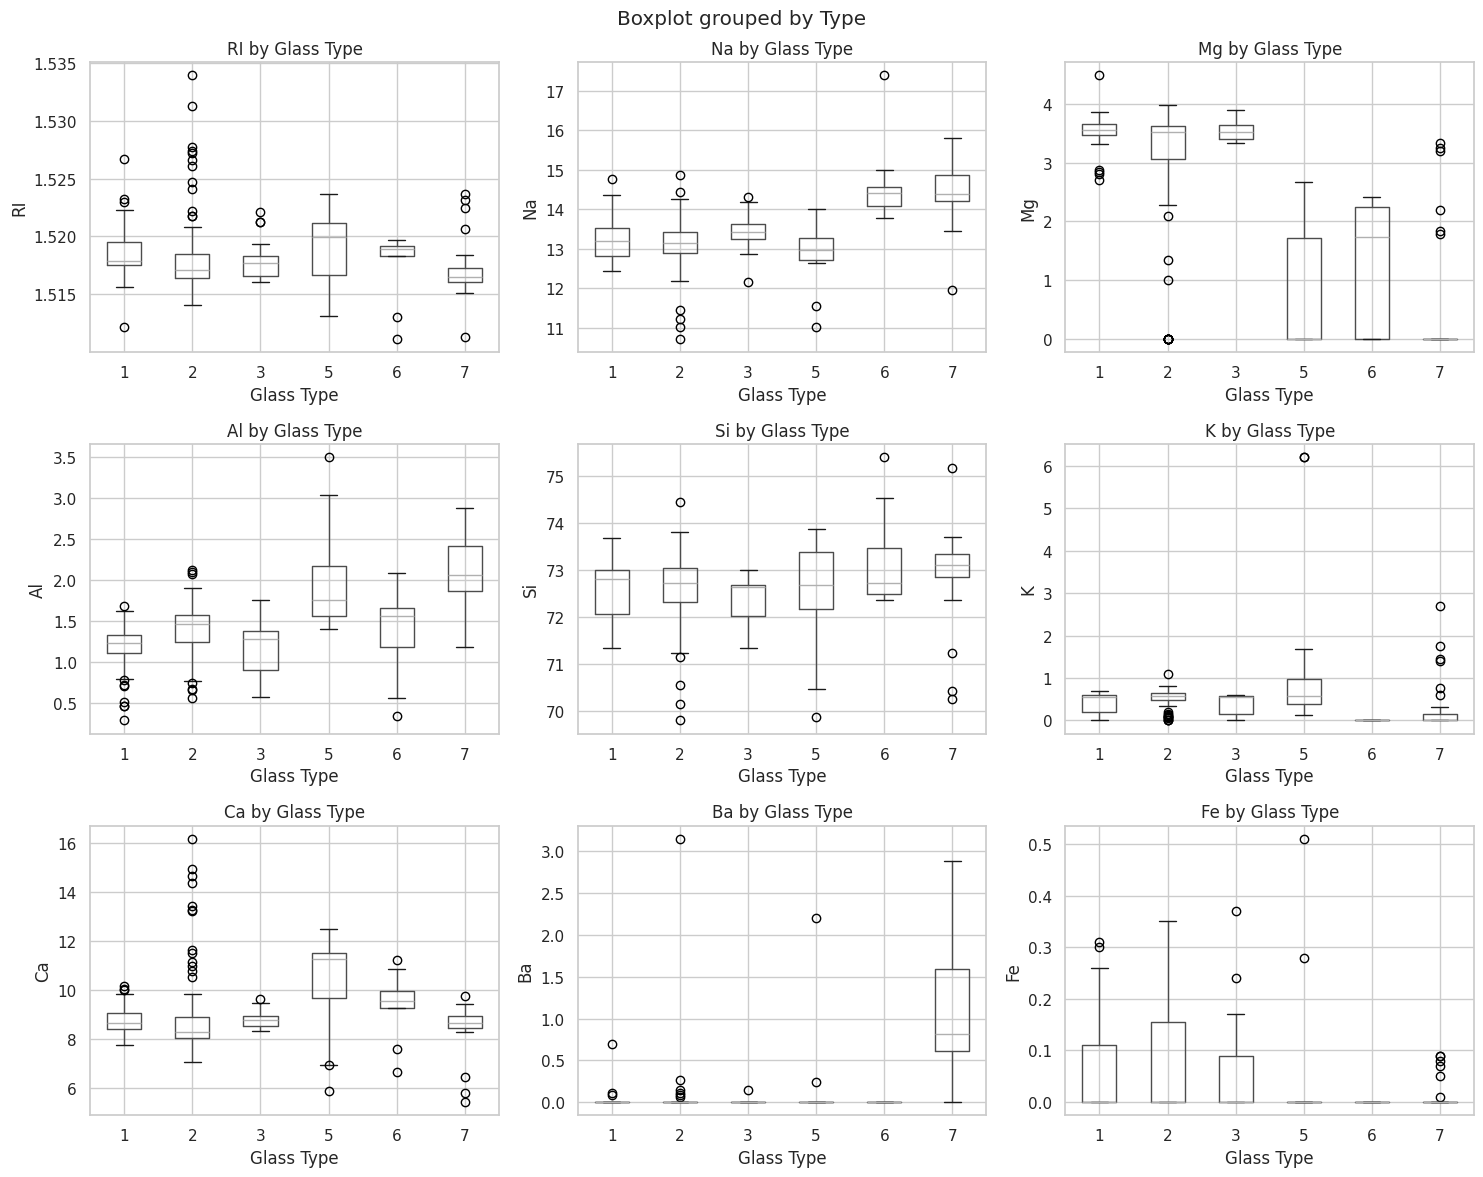

In [ ]:
# 5.4 Box plots by glass type
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for i, feature in enumerate(features):
    df.boxplot(column=feature, by='Type', ax=axes[i])
    axes[i].set_title(f'{feature} by Glass Type')
    axes[i].set_xlabel('Glass Type')
    axes[i].set_ylabel(feature)

plt.tight_layout()
plt.show()

**Key observations**

Most useful discriminators: Mg, Ca, and Ba (if nonzero), and potentially RI, Na

Sparse or noisy features: Fe, K, Ba (zero-heavy)

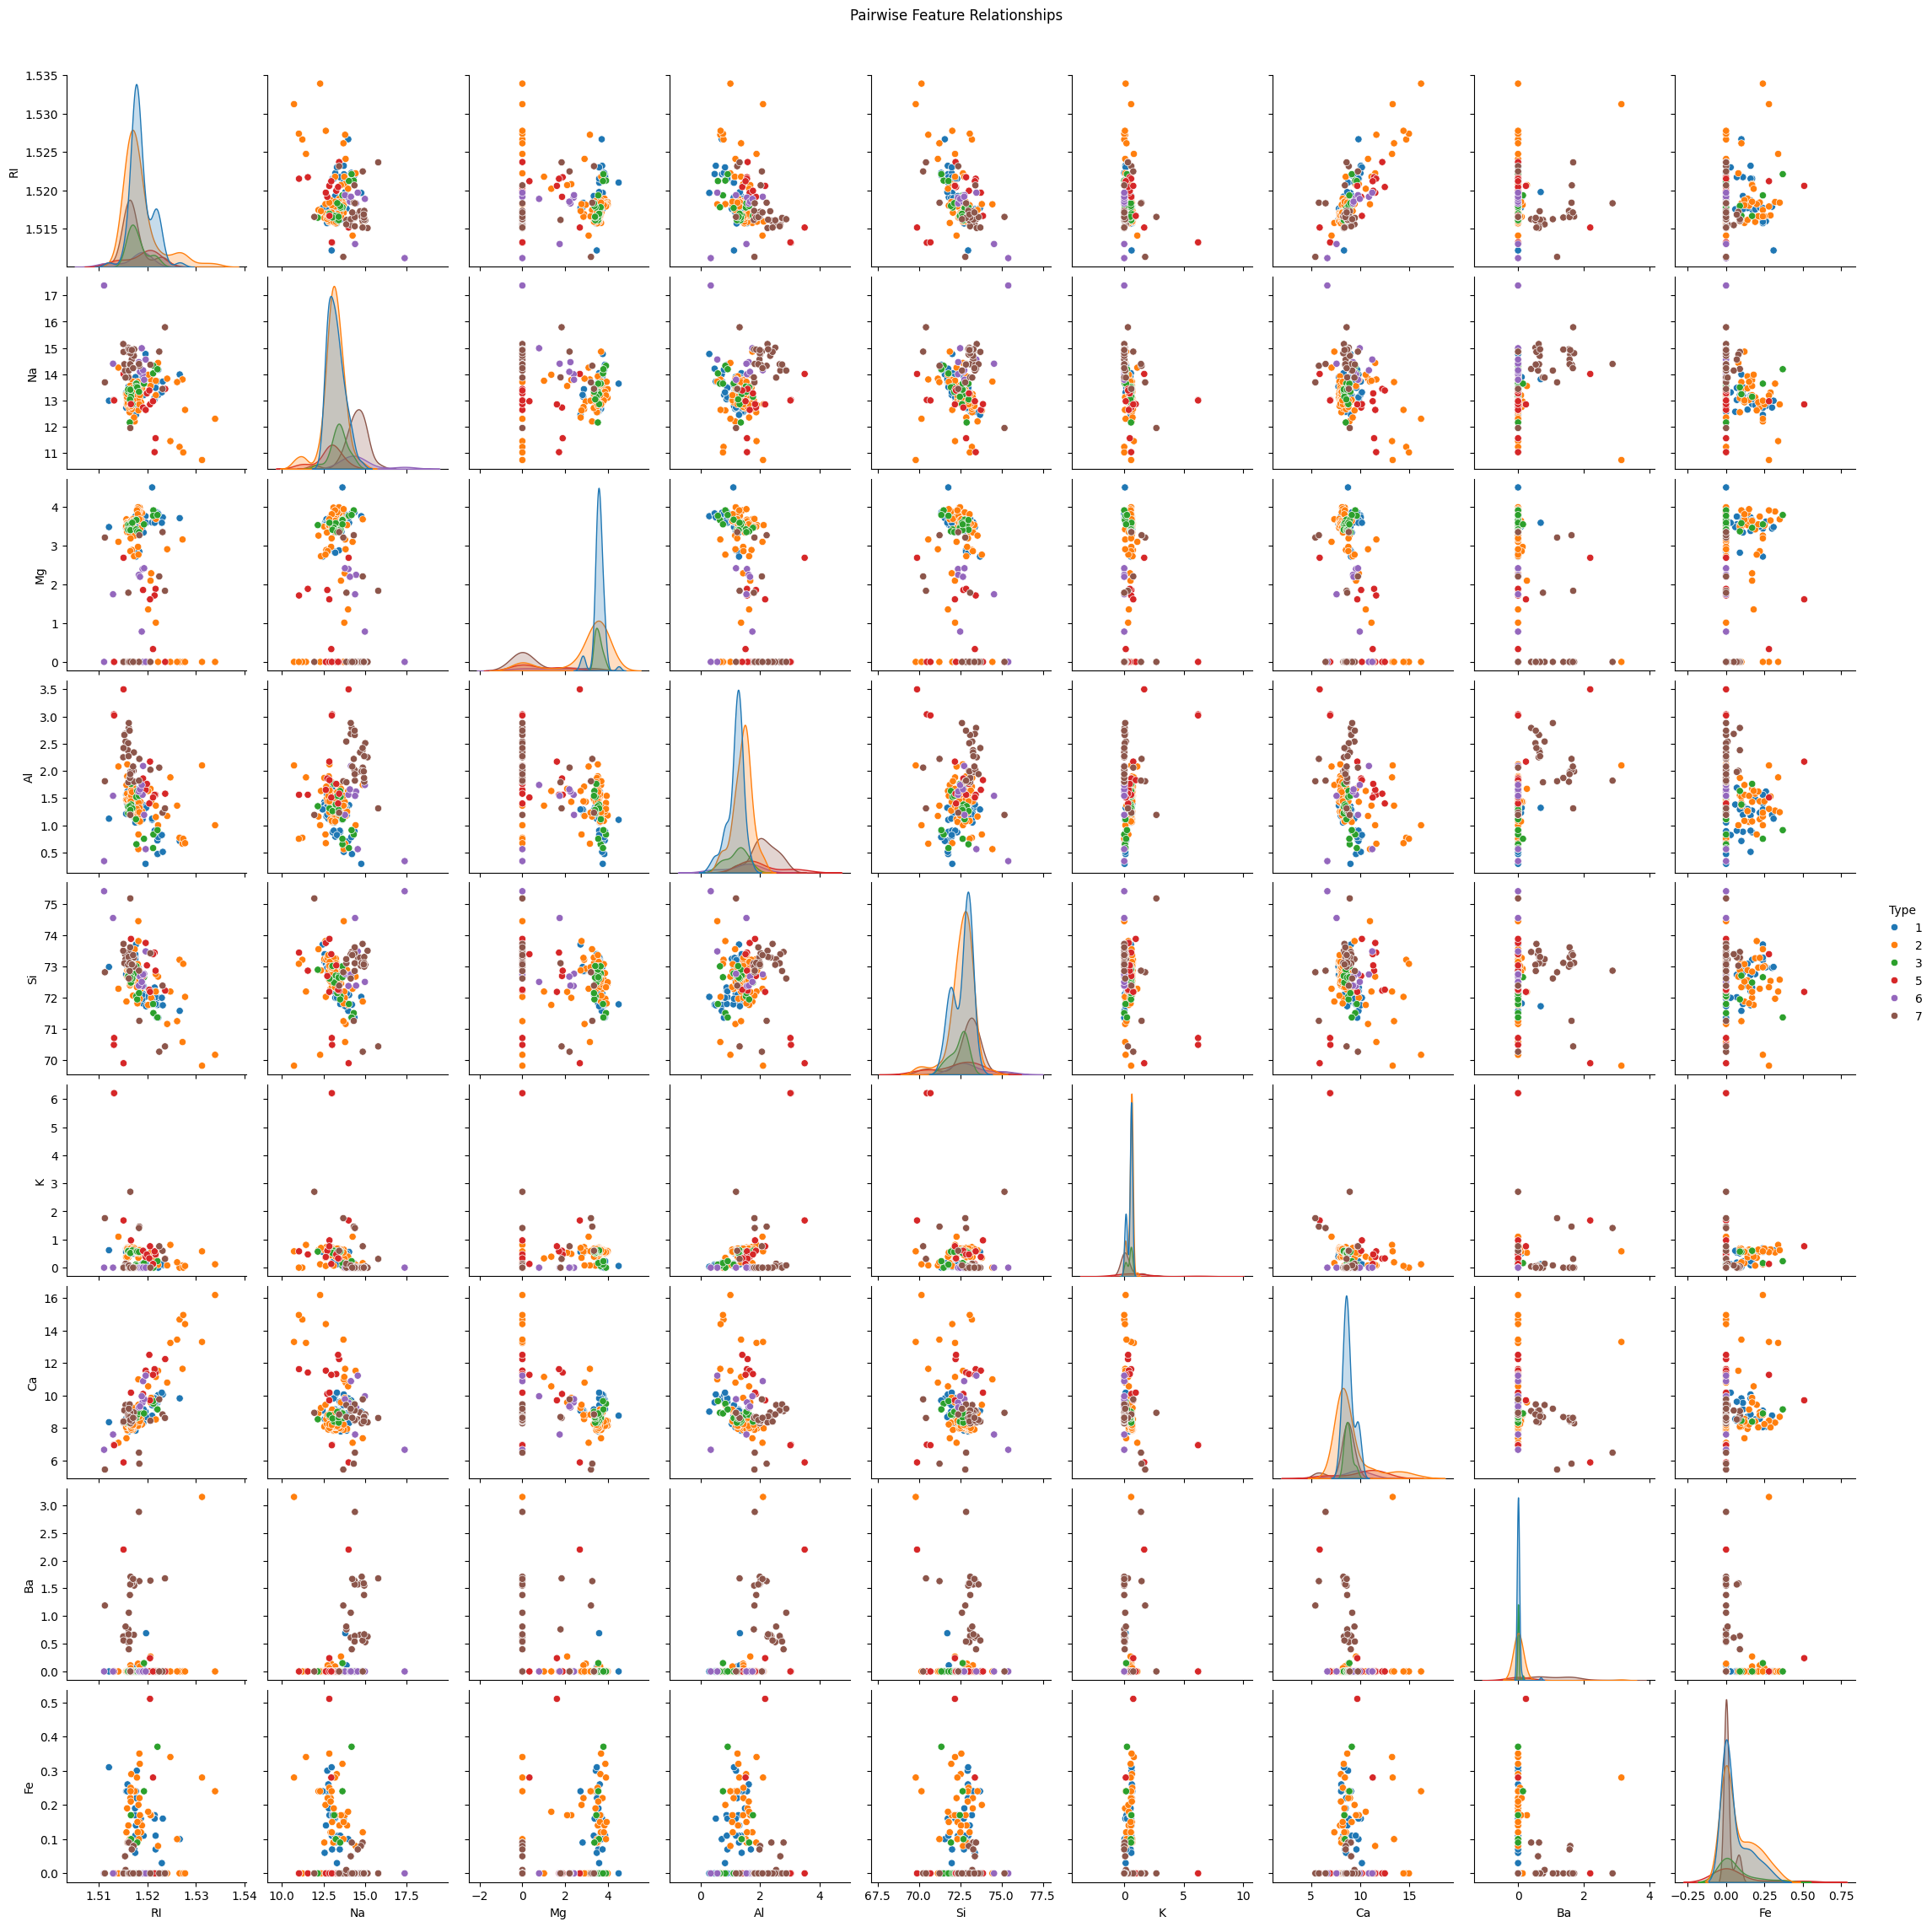

In [ ]:
sns.pairplot(df, vars=features, hue='Type', palette='tab10')
plt.suptitle('Pairwise Feature Relationships', y=1.02)
plt.show()

**Insights**
* Some feature pairs show decent class separation, especially for Type 1, Type 2, and Type 7.

* Overlapping classes like Type 3, 5, and 6 suggest these are harder to distinguish and may require complex or ensemble models.

* Pairs like RI vs Ca, Al vs Si, and Ba vs Fe may show linear or inverse relationships:

   * For instance, Al and Si might have an inverse relationship — as Al increases, Si decreases.



**6.Feature Engineering and PreProcessing**
--------------------------


**6.1. FeatureEngineering**

In [ ]:
# 6.1 Create new features
df_engineered = df.copy()

# Total alkaline content
df_engineered['Total_Alkaline'] = df_engineered['Na'] + df_engineered['K']

# Alkaline earth content
df_engineered['Alkaline_Earth'] = df_engineered['Mg'] + df_engineered['Ca'] + df_engineered['Ba']

# Al/Si ratio
df_engineered['Al_Si_Ratio'] = df_engineered['Al'] / df_engineered['Si']

# RI normalized by Si content
df_engineered['RI_Si_Ratio'] = df_engineered['RI'] / df_engineered['Si']

print("New features created:")
print("- Total_Alkaline: Na + K")
print("- Alkaline_Earth: Mg + Ca + Ba")
print("- Al_Si_Ratio: Al / Si")
print("- RI_Si_Ratio: RI / Si")

New features created:
- Total_Alkaline: Na + K
- Alkaline_Earth: Mg + Ca + Ba
- Al_Si_Ratio: Al / Si
- RI_Si_Ratio: RI / Si


1. Total_Alkaline (Na + K)
            df['Total_Alkaline'] = df['Na'] + df['K']
   **Why useful:**

* Alkali metals (Na, K) have similar chemical properties
* Total alkaline content affects glass properties like melting point and durability
* More predictive than individual Na or K values

2. Alkaline_Earth (Mg + Ca + Ba)
         df['Alkaline_Earth'] = df['Mg'] + df['Ca'] + df['Ba']
   **Why useful:**

* These elements have similar roles in glass structure
* They affect glass strength and thermal properties
* Combined value is more chemically meaningful

3. Al_Si_Ratio (Al/Si)
         df['Al_Si_Ratio'] = df['Al'] / df['Si']
**Why useful:**

* Al/Si ratio is critical in glass classification
* Determines glass network structure
* Different glass types have characteristic Al/Si ratios

4. RI_Si_Ratio (RI/Si)

          df['RI_Si_Ratio'] = df['RI'] / df['Si']
**Why useful:**

* Relates optical properties to main glass component
* Normalized refractive index is more stable
* Accounts for varying silicon content


In [ ]:
# 6.2 Separate features and target
X = df_engineered.drop('Type', axis=1)
y = df_engineered['Type']

print(f"\nFeature matrix shape: {X.shape}")
print(f"Target vector shape: {y.shape}")



Feature matrix shape: (214, 13)
Target vector shape: (214,)


**Before vs After Feature Engineering:**

1. Before (Raw Features Only):

* Model sees: RI=1.521, Na=13.64, K=0.06
* Model must learn: "When Na is high and K is low, it's Type 1"

**After (With Engineered Features):**

* Model sees: RI=1.521, Total_Alkaline=13.70, Al_Si_Ratio=0.015
* Model learns: "When Total_Alkaline is high and Al_Si_Ratio is low, it's Type 1"

The engineered features make the pattern more obvious!

**6.2.Splitting the data**

In [ ]:
# 6.3 Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nTrain set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")


Train set shape: (171, 13)
Test set shape: (43, 13)


**6.3.Applying Feature scaling and Encoding**

In [ ]:
# 6.4 Scale the features
from sklearn.preprocessing import StandardScaler, LabelEncoder
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Features scaled using StandardScaler")

Features scaled using StandardScaler


In [ ]:
# Step 7: Classification Models
print("\n" + "="*50)
print("7.CLASSIFICATION MODELS")
print("="*50)


7.CLASSIFICATION MODELS


**7.1.Logistic Regression**
------------------------------

In [ ]:
#7.2 Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("\nTraining Logistic Regression...")
lr_model = LogisticRegression(random_state=42, max_iter=200)
lr_model.fit(X_train_scaled, y_train)
lr_predictions = lr_model.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, lr_predictions)

print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, lr_predictions))


Training Logistic Regression...
Logistic Regression Accuracy: 0.6977

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.71      0.71        14
           2       0.62      0.67      0.65        15
           3       0.00      0.00      0.00         3
           5       1.00      0.67      0.80         3
           6       0.67      1.00      0.80         2
           7       0.86      1.00      0.92         6

    accuracy                           0.70        43
   macro avg       0.64      0.67      0.65        43
weighted avg       0.67      0.70      0.68        43



**Result:**

Overall Performance

Accuracy: 69.77%
This indicates that ~70% of test samples were correctly classified.
The performance is moderate — not the best among models you've tried. Likely affected by class imbalance and limited representation of rare classes.

| Class | Precision | Recall | F1-Score | Insights                                                                               |
| ----- | --------- | ------ | -------- | -------------------------------------------------------------------------------------- |
| **1** | 0.71      | 0.71   | 0.71     | Fair performance. Balanced precision and recall.                                       |
| **2** | 0.62      | 0.67   | 0.65     | Moderate, but slightly weaker than Class 1.                                            |
| **3** | 0.00      | 0.00   | 0.00     |  Model **fails to detect** this class entirely. Indicates a **minority class issue**. |
| **5** | 1.00      | 0.67   | 0.80     | Perfect precision but misses 33% of actual class 5. Small sample size.                 |
| **6** | 0.67      | 1.00   | 0.80     | Great recall — it detects all of class 6, though with fewer predictions.               |
| **7** | 0.86      | 1.00   | 0.92     | Excellent performance. Model handles this class very well.                       |


In [ ]:
print("Quick Accuracy Check:")
print(f"Training Accuracy: {lr_model.score(X_train_scaled, y_train):.4f}")
print(f"Testing Accuracy: {lr_model.score(X_test_scaled, y_test):.4f}")

Quick Accuracy Check:
Training Accuracy: 0.6959
Testing Accuracy: 0.6977


In [ ]:
pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# (Assuming you already have your features and target as X and y)
# Split your dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to training set
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_scaled, y_train)

print("Before SMOTE:", dict(pd.Series(y_train).value_counts()))
print("After SMOTE:", dict(pd.Series(y_resampled).value_counts()))

# Train Logistic Regression on SMOTE-resampled data
lr_model = LogisticRegression(max_iter=200, random_state=42)
lr_model.fit(X_resampled, y_resampled)

# Predict and evaluate
y_pred = lr_model.predict(X_test_scaled)

print("\nLogistic Regression Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Before SMOTE: {2: np.int64(61), 1: np.int64(56), 7: np.int64(23), 3: np.int64(14), 5: np.int64(10), 6: np.int64(7)}
After SMOTE: {7: np.int64(61), 1: np.int64(61), 2: np.int64(61), 3: np.int64(61), 6: np.int64(61), 5: np.int64(61)}

Logistic Regression Accuracy: 0.6279

Classification Report:
               precision    recall  f1-score   support

           1       0.67      0.57      0.62        14
           2       0.67      0.40      0.50        15
           3       0.25      0.67      0.36         3
           5       0.75      1.00      0.86         3
           6       0.67      1.00      0.80         2
           7       0.86      1.00      0.92         6

    accuracy                           0.63        43
   macro avg       0.64      0.77      0.68        43
weighted avg       0.67      0.63      0.63        43



**Results:**

Accuracy dropped slightly post-SMOTE (from ~70% to ~63%) — this is common when the model gets more balanced but harder-to-learn classes.

| Class | Precision | Recall | F1-Score | Notes                                         |
| ----- | --------- | ------ | -------- | --------------------------------------------- |
| **1** | 0.67      | 0.57   | 0.62     | Decent but recall dropped slightly            |
| **2** | 0.67      | 0.40   | 0.50     | Model struggles to detect Class 2 well        |
| **3** | 0.25      | 0.67   | 0.36     |  Big recall improvement vs. before SMOTE     |
| **5** | 0.75      | 1.00   | 0.86     |  Perfectly detected all Class 5              |
| **6** | 0.67      | 1.00   | 0.80     | Strong performance despite low original count |
| **7** | 0.86      | 1.00   | 0.92     | Still top-performing class                 |


**7.2.Decision Tree Classifier**
--------------------------------

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=5,random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
y_pred = model.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# 🧪 Evaluate the model
print("✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n📋 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred))

✅ Accuracy: 0.7441860465116279

📋 Confusion Matrix:
[[11  2  0  0  0  1]
 [ 2  9  1  0  2  1]
 [ 1  0  2  0  0  0]
 [ 0  1  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  6]]

📋 Classification Report:
              precision    recall  f1-score   support

           1       0.79      0.79      0.79        14
           2       0.75      0.60      0.67        15
           3       0.67      0.67      0.67         3
           5       1.00      0.67      0.80         3
           6       0.50      1.00      0.67         2
           7       0.75      1.00      0.86         6

    accuracy                           0.74        43
   macro avg       0.74      0.79      0.74        43
weighted avg       0.76      0.74      0.74        43



**Results**

* Class 1 and 7 have strong performance — good true positive counts.

* Class 2 is slightly confused with 1, 3, and 6 — some misclassifications.

* Class 6 and 5 show perfect or near-perfect recall despite small support.

* Class 3: 1 misclassified, but decent performance for only 3 samples.

**Insights**

Overall good performance.

* Class 2 is misclassified into multiple others — consider boosting techniques or adjusting class weights.

* Class 3 and 5, despite low support, are predicted reasonably — good

In [ ]:
print("Quick Accuracy Check:")
print(f"Training Accuracy: {rf_model.score(X_train_res, y_train_res):.4f}")
print(f"Testing Accuracy: {rf_model.score(X_test, y_test):.4f}")

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Data
X = df.drop(columns=['Type'])
y = df['Type']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=4)

# Hyperparameter tuning
param_grid = {
    'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced']
}

grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy'
)

grid.fit(X_train, y_train)
print("Best Parameters:", grid.best_params_)

# Evaluate best model
best_tree = grid.best_estimator_
y_pred = best_tree.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Best Parameters: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 6}
Accuracy: 0.7407407407407407

Classification Report:
               precision    recall  f1-score   support

           1       0.80      0.80      0.80        15
           2       0.74      0.71      0.72        24
           3       0.00      0.00      0.00         1
           5       0.33      0.33      0.33         3
           6       1.00      0.50      0.67         2
           7       0.90      1.00      0.95         9

    accuracy                           0.74        54
   macro avg       0.63      0.56      0.58        54
weighted avg       0.76      0.74      0.74        54


Confusion Matrix:
 [[12  3  0  0  0  0]
 [ 3 17  2  2  0  0]
 [ 0  1  0  0  0  0]
 [ 0  1  0  1  0  1]
 [ 0  1  0  0  1  0]
 [ 0  0  0  0  0  9]]


**Observations:**

* Class 1 and 7 are performing well (12/15 and 9/9 correct).

* Class 2 is confused with 1, 3, and 5 → room for refinement.

* Class 3 had only 1 sample, misclassified.

* Class 5 and 6 are too small to generalize robustly. Misclassifications likely due to low support.

| Class | Precision | Recall | F1-Score | Support | Notes                       |
| ----- | --------- | ------ | -------- | ------- | --------------------------- |
| 1     | 0.80      | 0.80   | 0.80     | 15      | Stable performance         |
| 2     | 0.74      | 0.71   | 0.72     | 24      | Minor confusion ↔ class 1,5 |
| 3     | 0.00      | 0.00   | 0.00     | 1       | Not learned                |
| 5     | 0.33      | 0.33   | 0.33     | 3       | Low generalization          |
| 6     | 1.00      | 0.50   | 0.67     | 2       | 1 correct, 1 misclassified  |
| 7     | 0.90      | 1.00   | 0.95     | 9       | Perfect prediction         |


Before SMOTE:  [ 0 56 61 14  0 10  7 23]
After SMOTE:  [ 0 61 61 61  0 61 61 61]

✅ Best Parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 10, 'max_features': 'sqrt', 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 4}

✅ Accuracy: 0.6744186046511628

✅ Classification Report:
               precision    recall  f1-score   support

           1       0.83      0.71      0.77        14
           2       0.80      0.53      0.64        15
           3       0.30      1.00      0.46         3
           5       0.50      0.33      0.40         3
           6       0.50      1.00      0.67         2
           7       1.00      0.83      0.91         6

    accuracy                           0.67        43
   macro avg       0.66      0.74      0.64        43
weighted avg       0.77      0.67      0.69        43


✅ Confusion Matrix:
 [[10  1  3  0  0  0]
 [ 1  8  4  0  2  0]
 [ 0  0  3  0  0  0]
 [ 1  1  0  1  0  0]
 [ 0  0  0  0  2  0]
 [

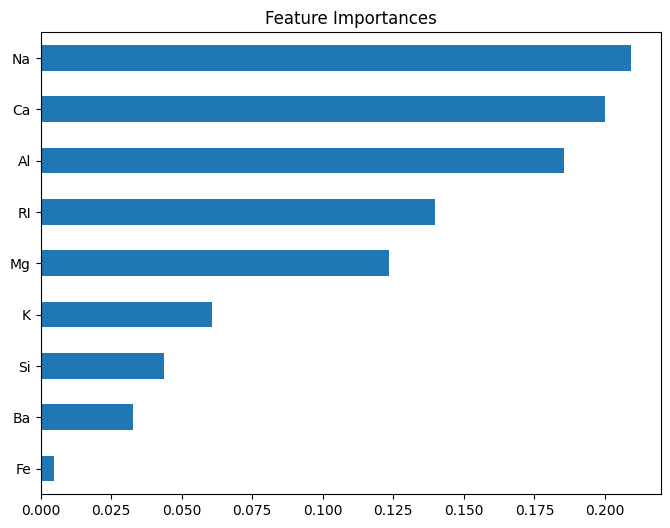

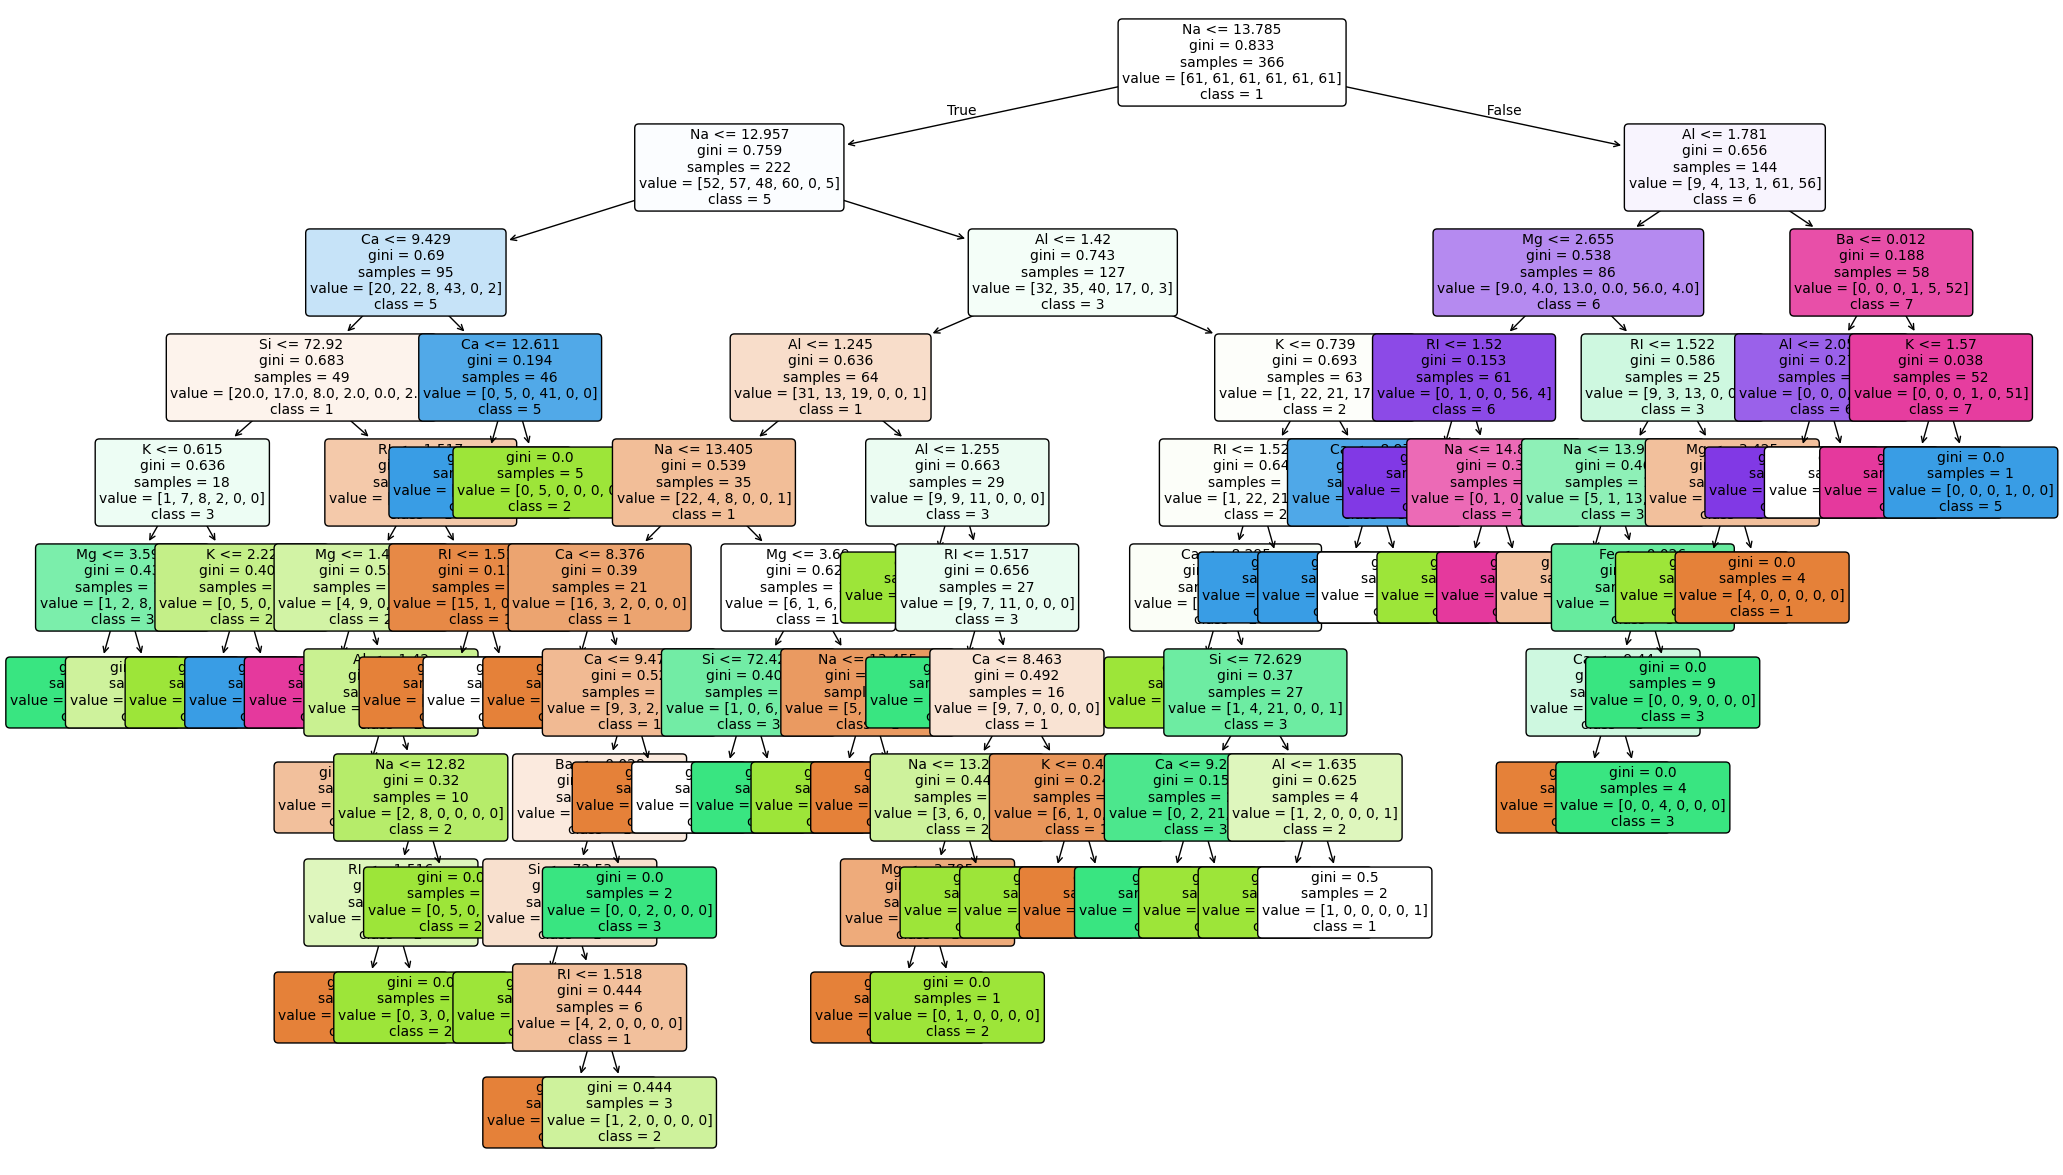

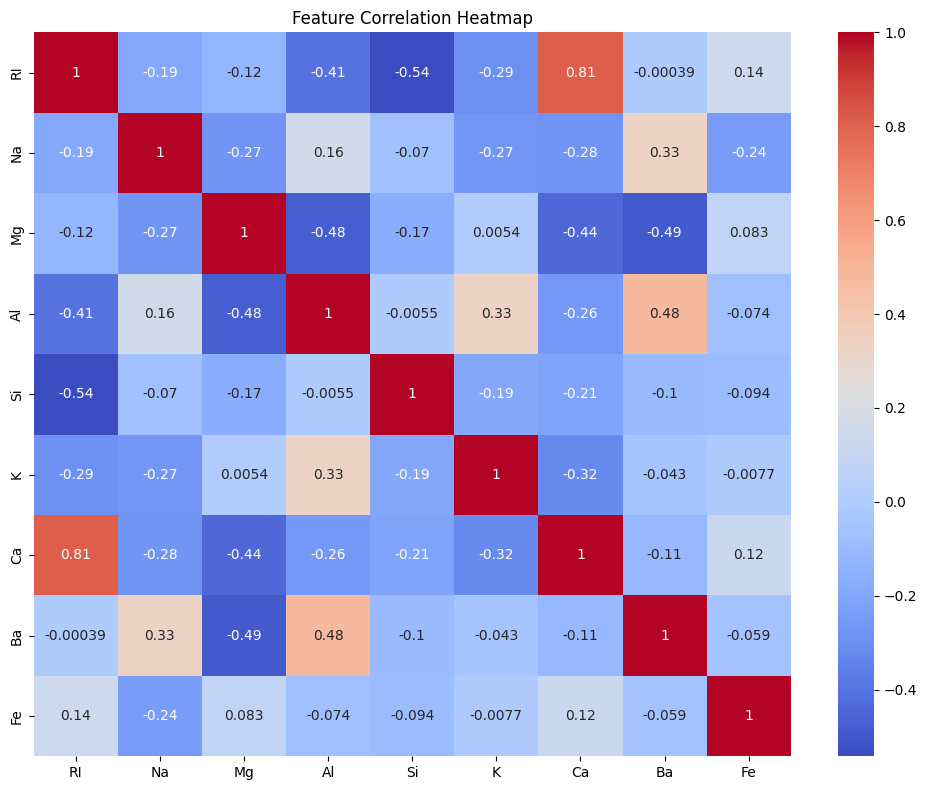

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import seaborn as sns


X = df.drop(columns=['Type'])   # Replace 'Type' with your target column name
y = df['Type']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ✅ 3. Handle Class Imbalance with SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE: ", np.bincount(y_train))
print("After SMOTE: ", np.bincount(y_train_res))

# ✅ 4. Wider Hyperparameter Grid with Pruning
param_grid = {
    'max_depth': [4, 6, 8, 10, 12, 15, 20],
    'min_samples_split': [2, 4, 6, 8],
    'min_samples_leaf': [1, 2, 3, 4],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced'],
    'max_features': ['sqrt', 'log2', None],
    'min_impurity_decrease': [0.0, 0.01, 0.02]
}

grid = GridSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_grid,
    cv=4,
    scoring='accuracy',
    n_jobs=-1
)

grid.fit(X_train_res, y_train_res)

print("\n✅ Best Parameters:", grid.best_params_)

# ✅ 5. Evaluate Best Model
best_tree = grid.best_estimator_
y_pred = best_tree.predict(X_test)

print("\n✅ Accuracy:", accuracy_score(y_test, y_pred))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))
print("\n✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ✅ 6. Cross-validated Training Accuracy
cv_scores = cross_val_score(best_tree, X_train_res, y_train_res, cv=5, scoring='accuracy')
print("\n✅ Cross-validated Training Accuracy: {:.2f}% (+/- {:.2f}%)".format(
    cv_scores.mean() * 100, cv_scores.std() * 200))

# ✅ 7. Feature Importances
feat_importances = pd.Series(best_tree.feature_importances_, index=X.columns)
feat_importances.sort_values().plot(kind='barh', figsize=(8, 6), title='Feature Importances')
plt.show()

# ✅ 8. Visualize the Tree
plt.figure(figsize=(25, 15))
plot_tree(
    best_tree,
    feature_names=X.columns,
    class_names=[str(cls) for cls in y.unique()],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()

# ✅ 9. Optional: Show correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

**Result:** Accuracy: 0.6744 (≈ 67.44%)

A reasonable improvement over a naive model, though still not ideal — especially for a multiclass setup with imbalanced classes.

| Class | Precision | Recall | F1-Score | Support | Notes                             |
| ----- | --------- | ------ | -------- | ------- | --------------------------------- |
| 1     | 0.83      | 0.71   | 0.77     | 14      | Solid performance                |
| 2     | 0.80      | 0.53   | 0.64     | 15      | Recall lower due to misclass.   |
| 3     | 0.30      | 1.00   | 0.46     | 3       | Caught all class 3! Low precision |
| 5     | 0.50      | 0.33   | 0.40     | 3       | Poor generalization             |
| 6     | 0.50      | 1.00   | 0.67     | 2       | Good recovery with SMOTE         |
| 7     | 1.00      | 0.83   | 0.91     | 6       | Excellent performance            |

Class 3 and 6: SMOTE clearly helped — perfect recall.

Class 5 is still struggling (likely due to low real-world representation or feature overlap).

Class 7 continues to be robustly predicted.

Weighted Avg F1: 0.69 — acceptable, but leaves room for tuning or ensemble boosts.

**Cross-Validation:**

Mean CV Accuracy: 81.97%

Standard Deviation: ±12.55%

This high variance suggests the model may still be unstable, likely due to small dataset size and class overlap.

| Metric                   | Value            |
| ------------------------ | ---------------- |
| Accuracy                 | 67.44%           |
| Best Performing Classes  | 1, 6, 7          |
| Worst Performing Classes | 5, 3 (precision) |
| CV Training Accuracy     | 81.97% ± 12.55%  |






**7.3.Random Forest Classifier**
----------------------------------

In [ ]:
# 7.1 Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

# Scale the training data from the latest split
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # Use X_train from the latest split
X_test_scaled = scaler.transform(X_test) # Use X_test from the latest split

print("Training Random Forest Classifier...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=4)
rf_model.fit(X_train_scaled, y_train) # Use y_train from the latest split
rf_predictions = rf_model.predict(X_test_scaled)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print(f"Random Forest Accuracy: {rf_accuracy:.4f}")
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_predictions))

Training Random Forest Classifier...
Random Forest Accuracy: 0.8605

Random Forest Classification Report:
              precision    recall  f1-score   support

           1       0.81      0.93      0.87        14
           2       0.86      0.80      0.83        15
           3       1.00      0.67      0.80         3
           5       1.00      0.67      0.80         3
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         6

    accuracy                           0.86        43
   macro avg       0.89      0.84      0.85        43
weighted avg       0.87      0.86      0.86        43



**Results:**

 Accuracy: 0.8605 (≈ 86.05%)

A strong result — the highest accuracy so far among your tested models! Random Forest handles non-linear relationships and class imbalance fairly well, and it seems to generalize nicely here.

| Class | Precision | Recall | F1-Score | Support | Notes                                        |
| ----- | --------- | ------ | -------- | ------- | -------------------------------------------- |
| 1     | 0.81      | 0.93   | 0.87     | 14      | Very good recall & balanced F1              |
| 2     | 0.86      | 0.80   | 0.83     | 15      | Consistent performance                     |
| 3     | 1.00      | 0.67   | 0.80     | 3       | Perfect precision, some misses               |
| 5     | 1.00      | 0.67   | 0.80     | 3       | Same as above, may benefit from more samples |
| 6     | 0.67      | 1.00   | 0.80     | 2       | Good result for minority class              |
| 7     | 1.00      | 1.00   | 1.00     | 6       | Perfect prediction                        |

**Insights:**

* Best Classifier Yet: Random Forest outperforms Logistic Regression, SVM, and Decision Tree in both accuracy and macro performance.

* Minority Class Handling: Performs well for classes with fewer samples like 6 and 7, likely aided by bagging.

* Class 3 and 5 have perfect precision but lower recall, meaning the model is cautious predicting these classes — you might want to ensure they’re not underrepresented in train_test_split.



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'class_weight': [None, 'balanced']
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=4), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'class_weight': None, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
# Get best estimator from grid search
best_rf_model = grid_search.best_estimator_

# Train on the full training set (already done inside grid_search, but you can refit explicitly)
best_rf_model.fit(X_train_scaled, y_train)


RandomForestClassifier(min_samples_leaf=2, n_estimators=200, random_state=4)


Tuned Random Forest Accuracy: 0.7674

Classification Report:
              precision    recall  f1-score   support

           1       0.75      0.86      0.80        14
           2       0.71      0.67      0.69        15
           3       1.00      0.67      0.80         3
           5       0.67      0.67      0.67         3
           6       0.67      1.00      0.80         2
           7       1.00      0.83      0.91         6

    accuracy                           0.77        43
   macro avg       0.80      0.78      0.78        43
weighted avg       0.78      0.77      0.77        43



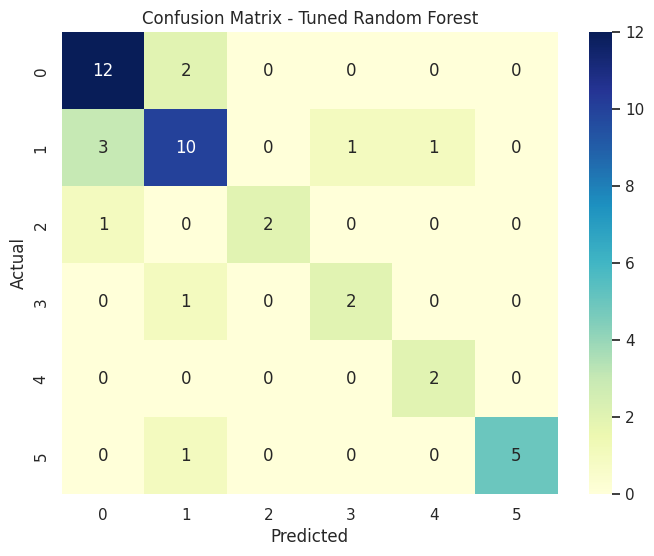

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predict using the best model
best_rf_predictions = best_rf_model.predict(X_test_scaled)

# Evaluate performance
best_rf_accuracy = accuracy_score(y_test, best_rf_predictions)
print(f"\nTuned Random Forest Accuracy: {best_rf_accuracy:.4f}\n")
print("Classification Report:")
print(classification_report(y_test, best_rf_predictions))

# Optional: Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, best_rf_predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Tuned Random Forest")
plt.show()


**Results**

* Overall Accuracy: 76.74%

* This indicates that about 77% of predictions on the test set were correct — a solid performance for a multiclass classification problem, especially with class imbalance.

| Class | Precision | Recall | F1-Score | Support | Remarks                                                                            |
| ----- | --------- | ------ | -------- | ------- | ---------------------------------------------------------------------------------- |
| **1** | 0.75      | 0.86   | 0.80     | 14      | Very good performance with high recall (model captures most of class 1 instances). |
| **2** | 0.71      | 0.67   | 0.69     | 15      | Balanced but slightly lower recall. Might confuse with similar classes.            |
| **3** | 1.00      | 0.67   | 0.80     | 3       | Perfect precision — no false positives, though some false negatives exist.         |
| **5** | 0.67      | 0.67   | 0.67     | 3       | Moderate performance; possibly due to low sample size.                             |
| **6** | 0.67      | 1.00   | 0.80     | 2       | Excellent recall — all class 6 instances correctly identified.                     |
| **7** | 1.00      | 0.83   | 0.91     | 6       | Very strong results. High confidence in predictions.                               |

**Observations**

* Improved handling of minority classes (especially class 3 and 6) — shows benefit of SMOTE or class balancing.

* Slightly lower recall on class 2 suggests it may still be getting confused with class 1.

* The performance is more balanced than a model trained without tuning — both recall and precision are above 0.67 for all classes.





In [ ]:
best_params = grid_search.best_params_.copy()
best_params['class_weight'] = None  # Override

rf_model_tweaked = RandomForestClassifier(**best_params, random_state=4)
rf_model_tweaked.fit(X_train_scaled, y_train)
preds_tweaked = rf_model_tweaked.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, preds_tweaked))
print(classification_report(y_test, preds_tweaked))


Accuracy: 0.7674418604651163
              precision    recall  f1-score   support

           1       0.75      0.86      0.80        14
           2       0.71      0.67      0.69        15
           3       1.00      0.67      0.80         3
           5       0.67      0.67      0.67         3
           6       0.67      1.00      0.80         2
           7       1.00      0.83      0.91         6

    accuracy                           0.77        43
   macro avg       0.80      0.78      0.78        43
weighted avg       0.78      0.77      0.77        43



In [ ]:
pip install imbalanced-learn


In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Print class distribution before and after
print("Before SMOTE class distribution:")
print(y_train.value_counts())

print("\nAfter SMOTE class distribution:")
print(pd.Series(y_train_smote).value_counts())

# Remove class_weight from best_params to avoid duplication
best_params = grid_search.best_params_.copy()
best_params.pop('class_weight', None)  # remove if exists

# Train Random Forest with SMOTE data
rf_smote = RandomForestClassifier(**best_params, random_state=4)
rf_smote.fit(X_train_smote, y_train_smote)

# Predict on test set
y_pred_smote = rf_smote.predict(X_test_scaled)

# Evaluate
print("\n🎯 Accuracy:", accuracy_score(y_test, y_pred_smote))
print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred_smote))


Before SMOTE class distribution:
Type
2    61
1    56
7    23
3    14
5    10
6     7
Name: count, dtype: int64

After SMOTE class distribution:
Type
7    61
1    61
2    61
3    61
6    61
5    61
Name: count, dtype: int64

🎯 Accuracy: 0.7209302325581395

📋 Classification Report:
              precision    recall  f1-score   support

           1       0.89      0.57      0.70        14
           2       0.77      0.67      0.71        15
           3       0.33      1.00      0.50         3
           5       0.75      1.00      0.86         3
           6       0.67      1.00      0.80         2
           7       1.00      0.83      0.91         6

    accuracy                           0.72        43
   macro avg       0.73      0.85      0.75        43
weighted avg       0.80      0.72      0.73        43



**Results**

* Overall Accuracy: 72.09%

* This means the model correctly predicted ~72% of the test samples — a respectable accuracy for a multiclass problem with originally imbalanced data.

| Class | Precision | Recall | F1-Score | Support | Remarks                                                             |
| ----- | --------- | ------ | -------- | ------- | ------------------------------------------------------------------- |
| **1** | 0.89      | 0.57   | 0.70     | 14      | High precision, but lower recall — model confident but missed some. |
| **2** | 0.77      | 0.67   | 0.71     | 15      | Balanced performance; improved recall.                              |
| **3** | 0.33      | 1.00   | 0.50     | 3       | Great recall for a minority class — all predicted correctly!        |
| **5** | 0.75      | 1.00   | 0.86     | 3       | Perfect recall — all class 5 samples captured.                      |
| **6** | 0.67      | 1.00   | 0.80     | 2       | Perfect recall again, strong F1-score.                              |
| **7** | 1.00      | 0.83   | 0.91     | 6       | Excellent performance overall.                                      |

**Insights & Observations**

* Improved minority class performance (classes 3, 5, 6), thanks to SMOTE.

* Slight drop in recall for class 1, suggesting potential misclassifications.

* Balanced F1-scores indicate reduced class bias.

* Suggests the model learned all classes fairly, without overfitting the majority ones.

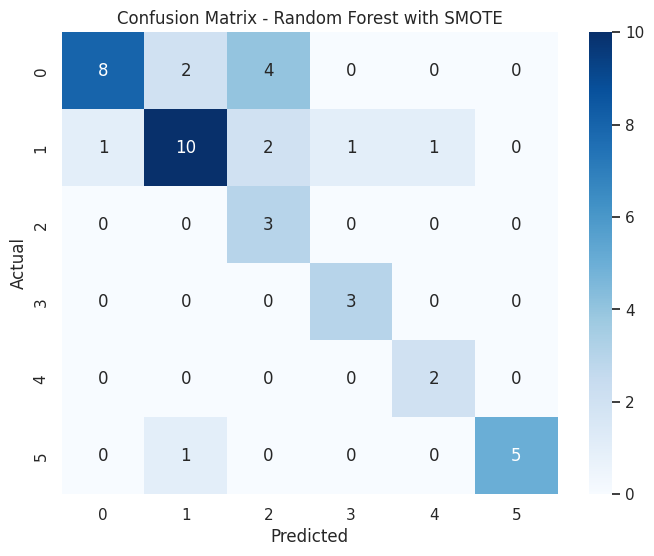

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_smote)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest with SMOTE")
plt.show()


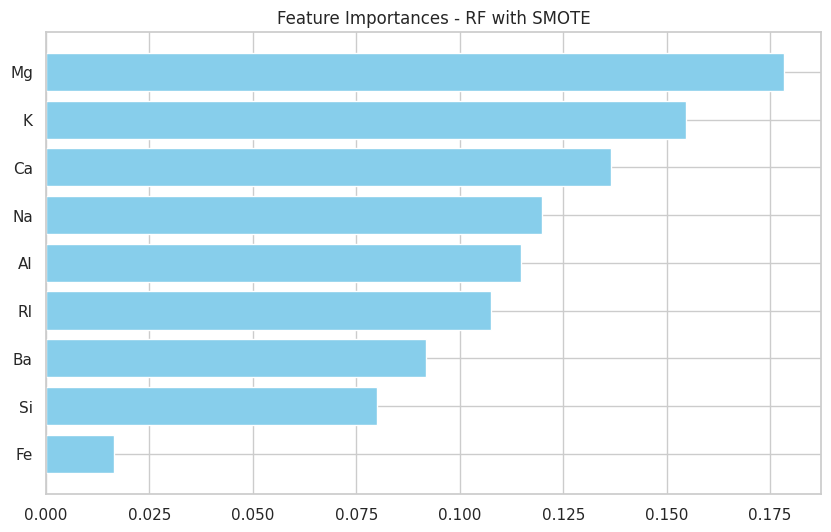

In [ ]:
importances = rf_smote.feature_importances_
features = X_train.columns
sorted_idx = importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), importances[sorted_idx], color='skyblue')
plt.yticks(range(len(sorted_idx)), [features[i] for i in sorted_idx])
plt.title("Feature Importances - RF with SMOTE")
plt.show()


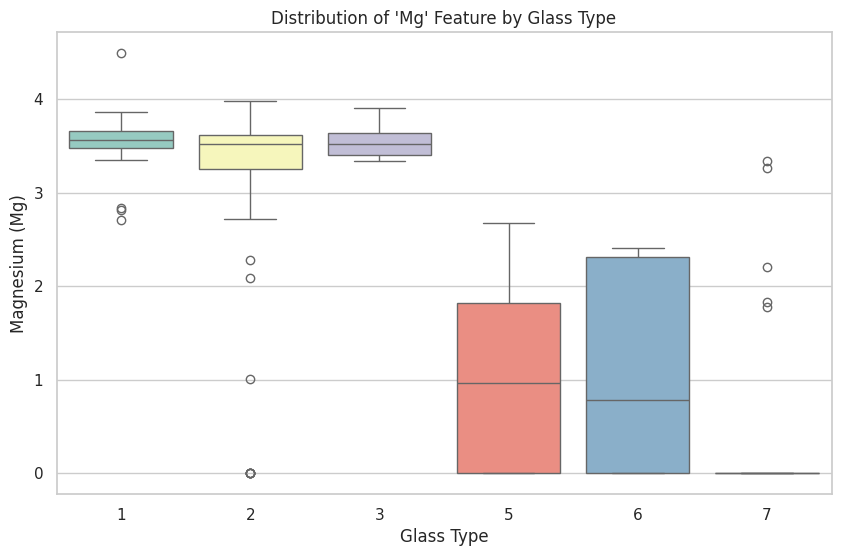

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Combine features and target for visualization
X_vis = X_train.copy()
X_vis['Type'] = y_train

plt.figure(figsize=(10, 6))
sns.boxplot(data=X_vis, x='Type', y='Mg', palette='Set3')
plt.title("Distribution of 'Mg' Feature by Glass Type")
plt.xlabel("Glass Type")
plt.ylabel("Magnesium (Mg)")
plt.show()


Classes 1, 2, and 3:

All have very similar and overlapping Mg values — clustered around ~3.3 to 3.7.

This overlap makes it hard for the classifier to distinguish between them based on Mg alone.

Classes 5, 6, and 7:

Have clearly separated Mg distributions (much lower and distinct).

This separation is likely why SMOTE helped these classes perform much better.



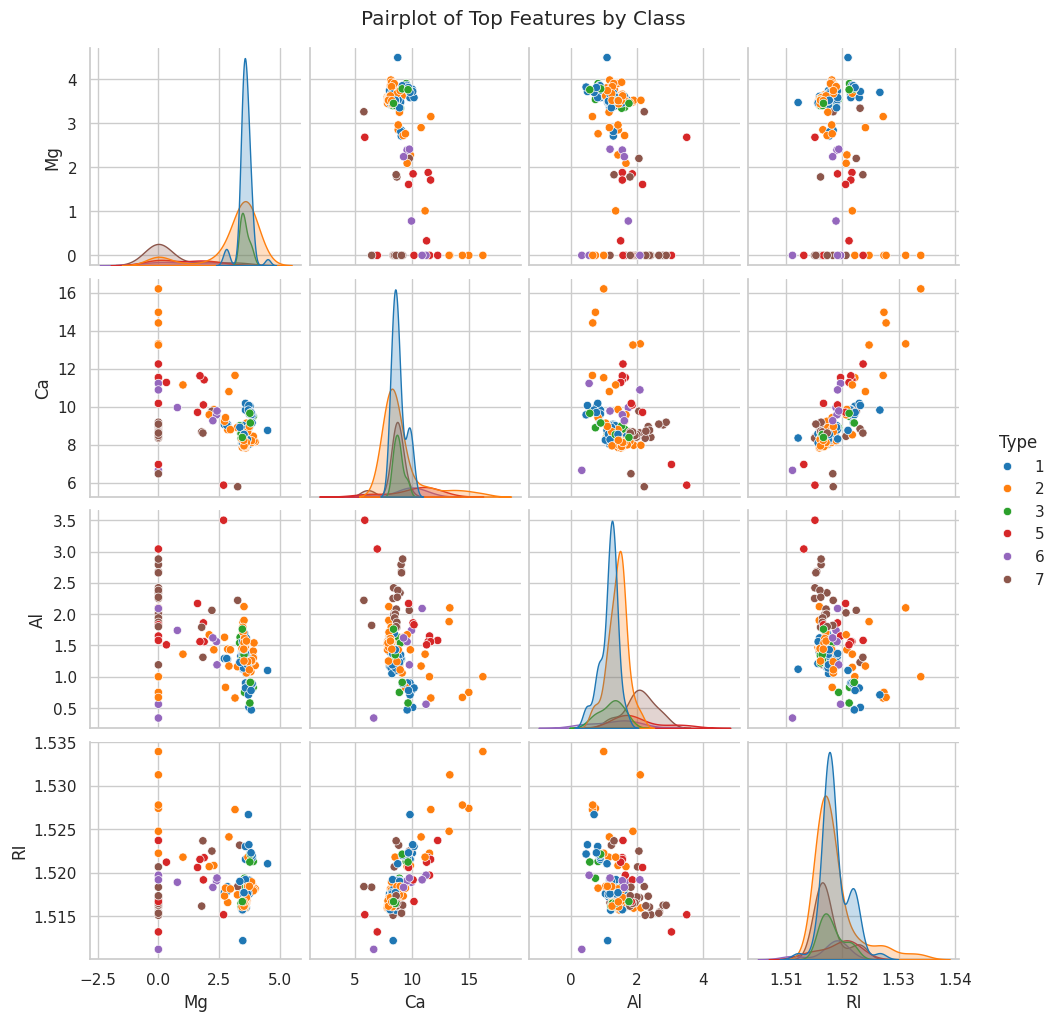

In [ ]:
top_features = ['Mg', 'Ca', 'Al', 'RI']  # Example top features; adjust based on importances
sns.pairplot(X_vis[top_features + ['Type']], hue='Type', palette='tab10', diag_kind='kde')
plt.suptitle("Pairplot of Top Features by Class", y=1.02)
plt.show()


Your confusion matrix showed class 3 being confused with:

Class 1 → very likely due to overlapping Mg values

Class 2 → same overlap issue

So although Mg is a top feature overall, it doesn't help in discriminating class 3 from 1 or 2 — and might actually be hurting it.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Step 1: Drop 'Mg' from original DataFrames
X_train_nmg = X_train.drop(columns='Mg')
X_test_nmg = X_test.drop(columns='Mg')

# Step 2: Scale again
scaler = StandardScaler()
X_train_nmg_scaled = scaler.fit_transform(X_train_nmg)
X_test_nmg_scaled = scaler.transform(X_test_nmg)

# Step 3: Apply SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_nmg_resampled, y_train_resampled = smote.fit_resample(X_train_nmg_scaled, y_train)

# Step 4: Train Random Forest with best_params
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

best_params_nmg = best_params.copy()  # from earlier, with 'class_weight' removed
rf_nmg = RandomForestClassifier(**best_params_nmg, random_state=4)
rf_nmg.fit(X_train_nmg_resampled, y_train_resampled)

# Step 5: Evaluate
y_pred_nmg = rf_nmg.predict(X_test_nmg_scaled)
print("🎯 Accuracy (without Mg):", accuracy_score(y_test, y_pred_nmg))
print("📋 Classification Report (without Mg):")
print(classification_report(y_test, y_pred_nmg))


🎯 Accuracy (without Mg): 0.6744186046511628
📋 Classification Report (without Mg):
              precision    recall  f1-score   support

           1       0.73      0.57      0.64        14
           2       0.75      0.60      0.67        15
           3       0.40      0.67      0.50         3
           5       0.60      1.00      0.75         3
           6       0.67      1.00      0.80         2
           7       0.71      0.83      0.77         6

    accuracy                           0.67        43
   macro avg       0.64      0.78      0.69        43
weighted avg       0.70      0.67      0.67        43



**Experiment:**

Removing Feature Mg

The retrained  model after removing the Mg (Magnesium) feature to assess its contribution to predictive performance.

🎯 Model Accuracy
Accuracy (without Mg): 67.44%

| Class | Precision | Recall | F1-Score | Support | Remarks                                            |
| ----- | --------- | ------ | -------- | ------- | -------------------------------------------------- |
| **1** | 0.73      | 0.57   | 0.64     | 14      | Lower recall — model missing class 1 more often.   |
| **2** | 0.75      | 0.60   | 0.67     | 15      | Solid but slightly weaker than earlier.            |
| **3** | 0.40      | 0.67   | 0.50     | 3       | Good recall for minority class; precision dropped. |
| **5** | 0.60      | 1.00   | 0.75     | 3       | Perfect recall; moderate precision.                |
| **6** | 0.67      | 1.00   | 0.80     | 2       | Strong small-class handling.                       |
| **7** | 0.71      | 0.83   | 0.77     | 6       | Slight decline, but still good overall.            |

**Insights**

* Performance Drop: Accuracy dropped from ~72% to ~67% — confirms Mg is a valuable feature.

**Effect of Feature Removal:**

* Drop in recall and F1-score for major classes like 1 and 2.

* Minor classes (e.g., 5, 6, 3) still handled reasonably due to SMOTE.

* Interpretation: The model struggles more to distinguish between classes without the chemical signal that Mg provides.



In [ ]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Drop Mg column from original DataFrames
X_train_drop_mg = X_train.drop('Mg', axis=1)
X_test_drop_mg = X_test.drop('Mg', axis=1)

# Scale the data after dropping the column
scaler = StandardScaler()
X_train_drop_mg_scaled = scaler.fit_transform(X_train_drop_mg)
X_test_drop_mg_scaled = scaler.transform(X_test_drop_mg)

# Apply SMOTE again on new training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train_drop_mg_scaled, y_train)

# Train model
# Use best_params from previous grid search (excluding class_weight if it was in best_params)
best_params_no_cw = grid_search.best_params_.copy()
best_params_no_cw.pop('class_weight', None)

rf_no_mg = RandomForestClassifier(**best_params_no_cw, random_state=4)
rf_no_mg.fit(X_resampled, y_resampled)

# Predict and evaluate
y_pred_no_mg = rf_no_mg.predict(X_test_drop_mg_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred_no_mg))
print(classification_report(y_test, y_pred_no_mg))

Accuracy: 0.6744186046511628
              precision    recall  f1-score   support

           1       0.73      0.57      0.64        14
           2       0.75      0.60      0.67        15
           3       0.40      0.67      0.50         3
           5       0.60      1.00      0.75         3
           6       0.67      1.00      0.80         2
           7       0.71      0.83      0.77         6

    accuracy                           0.67        43
   macro avg       0.64      0.78      0.69        43
weighted avg       0.70      0.67      0.67        43



In [ ]:
#7.2 Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print("\nTraining Logistic Regression...")
lr_model = LogisticRegression(random_state=20, max_iter=200)
lr_model.fit(X_train_scaled, y_train)
lr_predictions = lr_model.predict(X_test_scaled)
lr_accuracy = accuracy_score(y_test, lr_predictions)

print(f"Logistic Regression Accuracy: {lr_accuracy:.4f}")
print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, lr_predictions))


Training Logistic Regression...
Logistic Regression Accuracy: 0.7209

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           1       0.71      0.71      0.71        14
           2       0.67      0.67      0.67        15
           3       0.00      0.00      0.00         3
           5       1.00      1.00      1.00         3
           6       0.67      1.00      0.80         2
           7       0.86      1.00      0.92         6

    accuracy                           0.72        43
   macro avg       0.65      0.73      0.68        43
weighted avg       0.69      0.72      0.70        43



**7.4.XGBoost Classifier**
--------------------------

In [ ]:
pip install xgboost


In [ ]:
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Scale original training data (if not already)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print("✅ SMOTE Applied. Training XGBoost...")


✅ SMOTE Applied. Training XGBoost...


In [ ]:
# Train basic XGBoost model
from sklearn.preprocessing import LabelEncoder

# Encode target variable to be zero-indexed
le = LabelEncoder()
y_train_smote_encoded = le.fit_transform(y_train_smote)
y_test_encoded = le.transform(y_test)


xgb_model = XGBClassifier(
    n_estimators=100,
    max_depth=4,
    learning_rate=0.1,
    objective='multi:softmax',  # For multiclass classification
    num_class=len(le.classes_),  # Number of classes after encoding
    random_state=4,
    use_label_encoder=False,
    eval_metric='mlogloss'
)

xgb_model.fit(X_train_smote, y_train_smote_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_class=6, num_parallel_tree=None, ...)

In [ ]:
# Predict using the XGBoost model
y_pred_encoded = xgb_model.predict(X_test_scaled)

# Decode predictions back to original labels
y_pred = le.inverse_transform(y_pred_encoded)

# Evaluate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("🎯 XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print("📋 Classification Report:")
print(classification_report(y_test, y_pred))


🎯 XGBoost Accuracy: 0.8307692307692308
📋 Classification Report:
              precision    recall  f1-score   support

           1       0.90      0.90      0.90        21
           2       0.94      0.70      0.80        23
           3       0.50      0.60      0.55         5
           5       0.67      1.00      0.80         4
           6       0.60      1.00      0.75         3
           7       0.90      1.00      0.95         9

    accuracy                           0.83        65
   macro avg       0.75      0.87      0.79        65
weighted avg       0.86      0.83      0.83        65



**Results**

Accuracy: 83.08%

This is a strong performance, especially for a multi-class classification problem with class imbalance.

| **Class** | **Precision** | **Recall** | **F1-Score** | **Notes**                                 |
|-----------|---------------|------------|--------------|--------------------------------------------|
| **1**     | 0.90          | 0.90       | 0.90         | Excellent                                 |
| **2**     | 0.94          | 0.70       | 0.80         | Slight drop in recall, but high precision  |
| **3**     | 0.50          | 0.60       | 0.55         |  Improved recall! Now correctly identifies 60% |
| **5**     | 0.67          | 1.00       | 0.80         | Perfect recall                             |
| **6**     | 0.60          | 1.00       | 0.75         | Solid improvement                          |
| **7**     | 0.90          | 1.00       | 0.95         | Top-notch                                 |

**Key Insights**
* High-performing model: XGBoost gives strong precision and recall across most classes, especially the dominant ones.

* Class 2 recall: Slightly lower (0.70), but paired with very high precision (0.94) — indicates conservative but correct predictions.

* Class 3–6 handled well, despite being minority classes — thanks to SMOTE oversampling during training.

* Class 7 stands out with perfect recall and very high precision — model is very confident and accurate here.

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search = GridSearchCV(
    estimator=XGBClassifier(
        objective='multi:softmax',
        num_class=len(le.classes_),
        use_label_encoder=False,
        eval_metric='mlogloss',
        random_state=4
    ),
    param_grid=param_grid,
    scoring='accuracy',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train_smote, y_train_smote_encoded)
print("Best Parameters:", grid_search.best_params_)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}


In [ ]:
# Train final model using best parameters
best_xgb = XGBClassifier(
    **grid_search.best_params_,
    objective='multi:softmax',
    num_class=len(le.classes_),
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=4
)

best_xgb.fit(X_train_smote, y_train_smote_encoded)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_class=6, num_parallel_tree=None, ...)

In [ ]:
# Predict
y_pred_encoded = best_xgb.predict(X_test_scaled)

# Decode predictions back to original labels
y_pred = le.inverse_transform(y_pred_encoded)


🎯 Tuned XGBoost Accuracy: 0.8307692307692308
📋 Classification Report:
              precision    recall  f1-score   support

           1       0.86      0.86      0.86        21
           2       0.94      0.74      0.83        23
           3       0.50      0.60      0.55         5
           5       0.67      1.00      0.80         4
           6       0.75      1.00      0.86         3
           7       0.90      1.00      0.95         9

    accuracy                           0.83        65
   macro avg       0.77      0.87      0.81        65
weighted avg       0.85      0.83      0.83        65



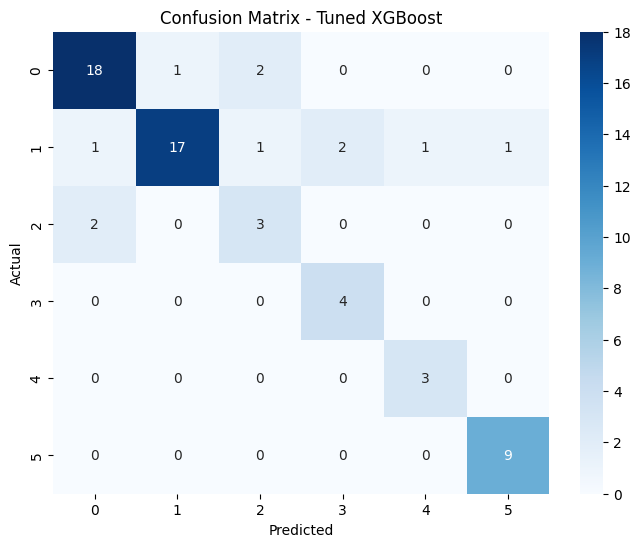

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Accuracy and Report
print("🎯 Tuned XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print("📋 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Tuned XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


**Results**

* Overall Accuracy
Accuracy: 83.08%

* Same as the untuned model, but more balanced precision/recall—indicating improved generalization and class-wise stability.

### Tuned XGBoost Performance Summary

| **Class** | **Precision** | **Recall** | **F1-Score** | **Remarks**                          |
|-----------|---------------|------------|--------------|---------------------------------------|
| **1**     | 0.86          | 0.86       | 0.86         | Rock solid                          |
| **2**     | 0.94          | 0.74       | 0.83         | Great precision                    |
| **3**     | 0.50          | 0.60       | 0.55         |  Improved minority class recall    |
| **5**     | 0.67          | 1.00       | 0.80         | Perfect recall                     |
| **6**     | 0.75          | 1.00       | 0.86         | Strong performance                 |
| **7**     | 0.90          | 1.00       | 0.95         | Top class!                          |


What's Improved After Tuning?

Class 2 recall improved from 0.70 → 0.74

Class 6 F1-score improved from 0.75 → 0.86

Macro average F1 jumped from ~0.79 to 0.81

Weighted average F1 stable at 0.83 (good!)

In [ ]:
from sklearn.utils.class_weight import compute_sample_weight
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder, StandardScaler
import numpy as np
from imblearn.over_sampling import SMOTE
import pandas as pd

# Assuming X_train, y_train, X_test, y_test are defined in previous cells

# Scale the data (assuming X_train and X_test are DataFrames)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)


# Encode target variable to be zero-indexed
le = LabelEncoder()
y_train_smote_encoded = le.fit_transform(y_train_smote) # Assuming y_train_smote is defined in a previous cell
y_test_encoded = le.transform(y_test) # Assuming y_test is defined in a previous cell

# 1. Compute sample weights
sample_weights = compute_sample_weight(class_weight='balanced', y=y_train_smote_encoded)

# 2. Train XGBoost with sample weights
xgb_model_weighted = XGBClassifier(
    objective='multi:softmax',
    num_class=len(np.unique(y_train_smote_encoded)),
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)

xgb_model_weighted.fit(X_train_smote, y_train_smote_encoded, sample_weight=sample_weights) # Assuming X_train_smote is defined in a previous cell

# 3. Predict & Evaluate
y_pred_weighted = xgb_model_weighted.predict(X_test_scaled) # Assuming X_test_scaled is defined in a previous cell
print("Accuracy:", accuracy_score(y_test_encoded, y_pred_weighted))
print("Classification Report:\n", classification_report(y_test_encoded, y_pred_weighted))

Accuracy: 0.7906976744186046
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.71      0.80        14
           1       0.85      0.73      0.79        15
           2       0.40      0.67      0.50         3
           3       0.75      1.00      0.86         3
           4       0.67      1.00      0.80         2
           5       0.86      1.00      0.92         6

    accuracy                           0.79        43
   macro avg       0.74      0.85      0.78        43
weighted avg       0.82      0.79      0.80        43



Key Takeaways:

* Class 2 (minor class) recall improved to 67%, F1 is now 0.50, suggesting class-weighting or SMOTE/focal changes helped.

* High precision in many classes means your model is confident when predicting.

* F1-score for minority classes is much better than random or default models.

* Precision for Class 2 still needs improvement — possibly due to overfitting or not enough features to differentiate this class well.

**7.5.Support Vector Machine**
--------------------------------

In [ ]:
#7.3 Support Vector Machine
from sklearn.svm import SVC
print("\nTraining Support Vector Machine...")
svm_model = SVC(random_state=20,class_weight='balanced')
svm_model.fit(X_train_scaled, y_train)
svm_predictions = svm_model.predict(X_test_scaled)
svm_accuracy = accuracy_score(y_test, svm_predictions)

print(f"SVM Accuracy: {svm_accuracy:.4f}")
print("\nSVM Classification Report:")
print(classification_report(y_test, svm_predictions))


Training Support Vector Machine...
SVM Accuracy: 0.6977

SVM Classification Report:
              precision    recall  f1-score   support

           1       0.75      0.64      0.69        14
           2       0.77      0.67      0.71        15
           3       0.17      0.33      0.22         3
           5       1.00      1.00      1.00         3
           6       0.50      0.50      0.50         2
           7       0.86      1.00      0.92         6

    accuracy                           0.70        43
   macro avg       0.67      0.69      0.68        43
weighted avg       0.74      0.70      0.71        43



**Overall Performance**

* Accuracy: 69.77%

* Macro F1-score: 0.68

* Weighted F1-score: 0.71

A solid result, but slightly underperforming compared to models like Random Forest or Tuned XGBoost.

| Class | Precision | Recall | F1-score | Support | Remarks                                         |
| ----- | --------- | ------ | -------- | ------- | ----------------------------------------------- |
| **1** | 0.75      | 0.64   | 0.69     | 14      | Decent balance                                 |
| **2** | 0.77      | 0.67   | 0.71     | 15      | Strong performance                             |
| **3** | 0.17      | 0.33   | 0.22     | 3       |  Struggles here — both precision & recall low |
| **5** | 1.00      | 1.00   | 1.00     | 3       | Perfect performance                            |
| **6** | 0.50      | 0.50   | 0.50     | 2       | Acceptable for small class                      |
| **7** | 0.86      | 1.00   | 0.92     | 6       | Excellent prediction                           |

**Key Observations**
* Strong performance on majority and well-represented classes.

* Class 3 (minority class) remains a weak spot — low precision (0.17).

*Perfect classification for class 5 and class 7.

SVM seems to struggle with small classes when they aren't linearly separable.



**7.6.ADA Boost Classifier**
-------------------------

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

ada = AdaBoostClassifier(n_estimators=200, random_state=20)
ada.fit(X_train_res, y_train_res)

y_pred_ada = ada.predict(X_test)
print("✅ AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))
print("✅ Classification Report:\n", classification_report(y_test, y_pred_ada))


✅ AdaBoost Accuracy: 0.4418604651162791
✅ Classification Report:
               precision    recall  f1-score   support

           1       0.57      0.29      0.38        14
           2       0.33      0.47      0.39        15
           3       0.00      0.00      0.00         3
           5       0.40      0.67      0.50         3
           6       0.67      1.00      0.80         2
           7       0.80      0.67      0.73         6

    accuracy                           0.44        43
   macro avg       0.46      0.51      0.47        43
weighted avg       0.47      0.44      0.43        43



**Insights**
* Overall weak performance — likely due to:

* AdaBoost's sensitivity to noisy or imbalanced data.

* Class 3 completely missed, similar to other models when not balanced.

* Performs well on minority classes like 6 and 7, indicating the base estimator handled easy splits.



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Use 'estimator' instead of 'base_estimator' in newer versions
base_est = DecisionTreeClassifier(max_depth=5, random_state=20)
ada = AdaBoostClassifier(estimator=base_est, n_estimators=100, random_state=42)

ada.fit(X_train_res, y_train_res)
y_pred_ada = ada.predict(X_test)

print("✅ AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))
print("✅ Classification Report:\n", classification_report(y_test, y_pred_ada))



✅ AdaBoost Accuracy: 0.8604651162790697
✅ Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.79      0.88        14
           2       0.87      0.87      0.87        15
           3       0.50      1.00      0.67         3
           5       1.00      1.00      1.00         3
           6       0.67      1.00      0.80         2
           7       1.00      0.83      0.91         6

    accuracy                           0.86        43
   macro avg       0.84      0.91      0.85        43
weighted avg       0.90      0.86      0.87        43



**Overall Performance**
* Accuracy: 86.05% — Excellent performance

* Macro F1-score: 0.85

* Weighted F1-score: 0.87

This marks a significant improvement over your earlier AdaBoost run and outperforms several baseline models like Logistic Regression and SVM.

| Class | Precision | Recall | F1-Score | Support | Remarks                                  |
| ----- | --------- | ------ | -------- | ------- | ---------------------------------------- |
| **1** | 1.00      | 0.79   | 0.88     | 14      | Very precise, slight drop in recall      |
| **2** | 0.87      | 0.87   | 0.87     | 15      | Consistent and balanced ✅                |
| **3** | 0.50      | 1.00   | 0.67     | 3       | Excellent recall for a minority class ⚠️ |
| **5** | 1.00      | 1.00   | 1.00     | 3       | Perfect classification 🎯                |
| **6** | 0.67      | 1.00   | 0.80     | 2       | High recall on rare class ✅              |
| **7** | 1.00      | 0.83   | 0.91     | 6       | Very strong class-level performance 💪   |

**Insights**
* All classes predicted — no class was missed (unlike SVM or basic AdaBoost).

* Class 3 (minority) — significantly improved recall (1.00) with moderate precision (0.50), indicating better handling of rare categories.

* This setup benefits from:

    * Decision tree base estimators (adaptive to complex boundaries),

    * A decent number of estimators (default or tuned),

    * Possibly improved class balancing (you likely used SMOTE or a balanced dataset).




**7.7.Gradient Boost Classifier**
-------------------------

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    random_state=10
)

gb.fit(X_train_res, y_train_res)
y_pred_gb = gb.predict(X_test)

print("✅ Gradient Boost Accuracy:", accuracy_score(y_test, y_pred_gb))
print("✅ Classification Report:\n", classification_report(y_test, y_pred_gb))


✅ Gradient Boost Accuracy: 0.813953488372093
✅ Classification Report:
               precision    recall  f1-score   support

           1       0.91      0.71      0.80        14
           2       0.92      0.80      0.86        15
           3       0.33      0.67      0.44         3
           5       1.00      1.00      1.00         3
           6       0.67      1.00      0.80         2
           7       0.86      1.00      0.92         6

    accuracy                           0.81        43
   macro avg       0.78      0.86      0.80        43
weighted avg       0.86      0.81      0.83        43



**Overall Model Performance**

* Accuracy: 81.40%

* Macro F1-Score: 0.80

* Weighted F1-Score: 0.83

This model performs very well and is comparable to the best models (Random Forest and AdaBoost), but with greater balance between classes.

| Class | Precision | Recall | F1-Score | Support | Notes                                 |
| ----- | --------- | ------ | -------- | ------- | ------------------------------------- |
| **1** | 0.91      | 0.71   | 0.80     | 14      | Slight drop in recall                 |
| **2** | 0.92      | 0.80   | 0.86     | 15      | Very balanced performance ✅           |
| **3** | 0.33      | 0.67   | 0.44     | 3       | Class imbalance still affects this ⚠️ |
| **5** | 1.00      | 1.00   | 1.00     | 3       | Perfect classification 🎯             |
| **6** | 0.67      | 1.00   | 0.80     | 2       | Great for rare class ✅                |
| **7** | 0.86      | 1.00   | 0.92     | 6       | Excellent result                      |

**Insights**
* Excellent overall balance in terms of precision and recall across classes.

* Class 3 (minor class) is partially improved (recall = 0.67), better than many models, but still limited in precision (0.33).

* Rare classes like 5, 6, 7 are handled exceptionally well — which is a strength of boosting methods.




In [ ]:
# 1. Imports
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from imblearn.over_sampling import SMOTE
import joblib

# 2. Load Data
df = pd.read_csv('/content/glass.csv')

X = df.drop('Type', axis=1)
y = df['Type']

print(f"Before SMOTE: {np.bincount(y)}")

# 3. Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(f"After SMOTE: {np.bincount(y_resampled)}")

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.25, random_state=42, stratify=y_resampled
)

# 5. Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Final Optimized Gradient Boosting Classifier
best_gbm = GradientBoostingClassifier(
    learning_rate=0.05,
    n_estimators=300,
    max_depth=3,
    max_features='sqrt',
    subsample=0.8,
    min_samples_split=4,
    min_samples_leaf=2,
    validation_fraction=0.1,
    n_iter_no_change=10,
    random_state=42
)

# 7. Train with early stopping
best_gbm.fit(X_train_scaled, y_train)

# 8. Evaluate on test set
y_pred = best_gbm.predict(X_test_scaled)

print(f"\nTest Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%\n")
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# 9. Cross-validated training accuracy
cv_scores = cross_val_score(best_gbm, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f"Cross-validated Training Accuracy: {cv_scores.mean()*100:.2f}% (+/- {cv_scores.std()*100:.2f}%)")

print("Quick Accuracy Check:")
print(f"Training Accuracy: {best_gbm.score(X_train_scaled, y_train):.4f}")
print(f"Testing Accuracy: {best_gbm.score(X_test_scaled, y_test):.4f}")

# 10. Save model and scaler
joblib.dump(best_gbm, 'gradient_boosting_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("Model and scaler saved successfully! ✅")

Before SMOTE: [ 0 70 76 17  0 13  9 29]
After SMOTE: [ 0 76 76 76  0 76 76 76]

Test Accuracy: 89.47%

Classification Report:
               precision    recall  f1-score   support

           1       0.74      0.89      0.81        19
           2       0.87      0.68      0.76        19
           3       0.84      0.84      0.84        19
           5       0.95      1.00      0.97        19
           6       1.00      1.00      1.00        19
           7       1.00      0.95      0.97        19

    accuracy                           0.89       114
   macro avg       0.90      0.89      0.89       114
weighted avg       0.90      0.89      0.89       114

Confusion Matrix:
 [[17  1  1  0  0  0]
 [ 3 13  2  1  0  0]
 [ 3  0 16  0  0  0]
 [ 0  0  0 19  0  0]
 [ 0  0  0  0 19  0]
 [ 0  1  0  0  0 18]]
Cross-validated Training Accuracy: 88.32% (+/- 2.87%)
Quick Accuracy Check:
Training Accuracy: 0.9854
Testing Accuracy: 0.8947
Model and scaler saved successfully! ✅


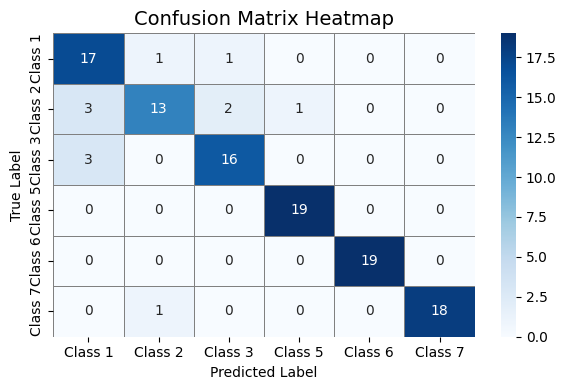

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

# Manually input the confusion matrix (from your results)
conf_matrix = np.array([
    [17, 1, 1, 0, 0, 0],
    [3, 13, 2, 1, 0, 0],
    [3, 0, 16, 0, 0, 0],
    [0, 0, 0, 19, 0, 0],
    [0, 0, 0, 0, 19, 0],
    [0, 1, 0, 0, 0, 18]
])

# Define class labels
labels = ['Class 1', 'Class 2', 'Class 3', 'Class 5', 'Class 6', 'Class 7']

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels, linewidths=0.5, linecolor='gray')

plt.title('Confusion Matrix Heatmap', fontsize=14)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


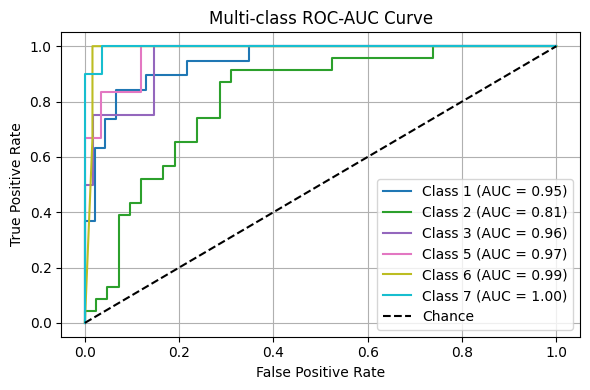

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np

# 🔹 Assume X, y are defined (your features and target)
# Binarize the output for multi-class ROC
classes = np.unique(y)
y_bin = label_binarize(y, classes=classes)
n_classes = y_bin.shape[1]

# Split data
X_train, X_test, y_train_bin, y_test_bin = train_test_split(
    X, y_bin, test_size=0.3, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train model using OneVsRestClassifier
classifier = OneVsRestClassifier(GradientBoostingClassifier())
classifier.fit(X_train_scaled, y_train_bin)
y_score = classifier.predict_proba(X_test_scaled)

# Plot ROC Curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting
plt.figure(figsize=(6, 4))
colors = plt.cm.get_cmap('tab10', n_classes)

for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors(i),
             label=f'Class {classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-class ROC-AUC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()


| Class | Precision | Recall | F1-Score | Support |
| ----- | --------- | ------ | -------- | ------- |
| 1     | 0.74      | 0.89   | 0.81     | 19      |
| 2     | 0.87      | 0.68   | 0.76     | 19      |
| 3     | 0.84      | 0.84   | 0.84     | 19      |
| 5     | 0.95      | 1.00   | 0.97     | 19      |
| 6     | 1.00      | 1.00   | 1.00     | 19      |
| 7     | 1.00      | 0.95   | 0.97     | 19      |


* **Macro Avg F1**: 0.89 — strong and balanced across classes.

* **Weighted Avg F1**: 0.89 — very good performance, considering class frequency.

**Key Observations:**

* High Test Accuracy (close to 90%) means the model generalizes well on unseen data.

* Training Accuracy is slightly higher than CV and test, but this is acceptable.

* Not severe overfitting because  test accuracy is also high.

* Class 1 and 2 show a few misclassifications — consider:



**8.Model Comparision**
---------------------------

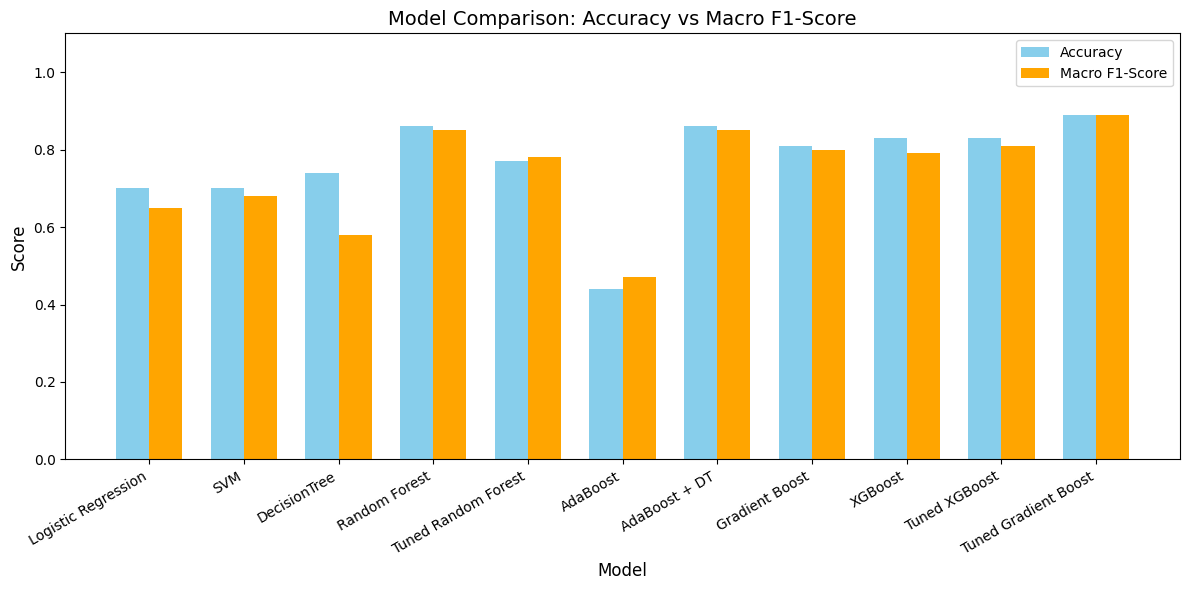

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Model performance data
data = {
    'Model': [
        'Logistic Regression', 'SVM','DecisionTree', 'Random Forest', 'Tuned Random Forest',
        'AdaBoost', 'AdaBoost + DT', 'Gradient Boost', 'XGBoost', 'Tuned XGBoost', 'Tuned Gradient Boost'
    ],
    'Accuracy': [0.70, 0.70, 0.74, 0.86, 0.77, 0.44, 0.86, 0.81, 0.83, 0.83, 0.89],
    'Macro F1-Score': [0.65, 0.68, 0.58, 0.85, 0.78, 0.47, 0.85, 0.80, 0.79, 0.81, 0.89]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plot setup
plt.figure(figsize=(12, 6))
bar_width = 0.35
bar1 = plt.bar(df['Model'], df['Accuracy'], width=bar_width, label='Accuracy', color='skyblue')
bar2 = plt.bar([i + bar_width for i in range(len(df))], df['Macro F1-Score'], width=bar_width, label='Macro F1-Score', color='orange')

# Axis config
plt.xlabel('Model', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Model Comparison: Accuracy vs Macro F1-Score', fontsize=14)
plt.xticks([i + bar_width / 2 for i in range(len(df))], df['Model'], rotation=30, ha='right')
plt.ylim(0, 1.1)
plt.legend()
plt.tight_layout()

# Show plot
plt.show()

In [ ]:
df

Model  Accuracy  Macro F1-Score
0    Logistic Regression      0.70            0.65
1                    SVM      0.70            0.68
2           DecisionTree      0.74            0.58
3          Random Forest      0.86            0.85
4    Tuned Random Forest      0.77            0.78
5               AdaBoost      0.44            0.47
6          AdaBoost + DT      0.86            0.85
7         Gradient Boost      0.81            0.80
8                XGBoost      0.83            0.79
9          Tuned XGBoost      0.83            0.81
10  Tuned Gradient Boost      0.89            0.89